## Menentukan Pertanyaan Bisnis

- Bagaimana trend polusi udara di kota Guanyuan?
- Bagaimana trend perubahan suhu dan tekanan udara di Guanyuan?
- Bagaimana pengaruh tingkat polusi udara dengan perubahan suhu dan tekanan di Guanyuan?
- Pada rentang waktu apa tingkat partikel yang ada di udara di kota Guanyuan cenderung tinggi?

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Data Wrangling

### Data Gathering

Proses pengumpulan data dimulai dengan membuat dataframe yang menampilkan data, data yang didapat berasal dari sumber [berikut](https://https://github.com/marceloreis/HTI/tree/master/PRSA_Data_20130301-20170228)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Membuat data tabel guanyuan_df
guanyuan_df = pd.read_csv("/content/drive/MyDrive/DATA/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan

### Data Understanding

Data understanding dilakukan dengan tujuan memahami data serta mencari informasi mengenai data yang terkait dengan tiap kolom dan tipe data nya

In [4]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


keterangan dari setiap kolom:
- year: tahun dimana data tersebut diambil
- month: bulan dimana data tersebut diambil
- day: hari atau tanggal dimana data tersebut diambil
- hour: waktu dimana data tersebut diambil
- PM2.5: partikel udara yang berukuran lebih kecil dari atau sama dengan 2.5 µm (mikrometer)
- PM10: partikel udara yang berukuran lebih kecil dari atau sama dengan 10 µm (mikrometer)
- SO2: salah satu spesies dari gas-gas oksida sulfur (SOx).
- NO2: gas yang terdiri dari nitrogen dan oksigen
- CO: gas yang terdiri dari carbon dan oksida yang berjumlah satu atau monoksida
- O3: suatu gas yang sangat reaktif yang terdiri dari tiga atom oksigen, biasa disebut sebagai ozone
- TEMP: temperature atau suhu udara yang ada di sekitar lokasi
- PRES: pressure atau tekanan udara yang ada di sekitar lokasi
- DEWP: suhu titik embun yang diambil pada ketinggian yang sama dengan pengukuran suhu udara
- RAIN: curah hujan atau intensitas hujan yang terjadi di sekitar lokasi
- wd: arah angin yang berhembus saat data tersebut diambil
- WSPM: kecepatan angin per menit
- station: lokasi dimana data tersebut diambil

Selanjutnya dilakukan pencarian variabel yang tidak memiliki nilai di dalamnya. Terdapat beberapa variabel yang tidak memiliki nilai seperti pada hasil berikut.

In [5]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Lalu dilakukan perhitungan jumlah duplikasi, ditemukan bahwa tidak ada data yang terduplikasi.


In [6]:
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


Selanjutnya dilakukan penentuan parameter statistik dari masing-masing data

In [7]:
# menampilkan ringkasan parameter statistik (mean, median, dll.)
guanyuan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367     35.150857   1164.854945   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     31.000000    500.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      115.000000    149.000000     22.000000     78.000000   1600.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33891.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.795044     13.584607   1011.846920      3.123062      0.067421   
std       57.436983     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        7.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       41.000000     14.500000   1011.400000      3.800000      0.000000   
75%       81.000000     23.300000   1020.100000     15.600000      0.000000   
max      415.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

### Data Cleaning

Proses pembersihan data yang pertama adalah menghilangkan kolom variabel station. Hal ini dilakukan karena data yang digunakan hanya data dari stasiun Guanyuan sehingga kolom tersebut tidak diperlukan.

In [8]:
guanyuan_df = guanyuan_df.drop(columns = {'station'})
guanyuan_df.head(5)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM  
0  1023.0 -18.8   0.0  NNW   4.4  
1  1023.2 -18.2   0.0    N   4.7  
2  1023.5 -18.2   0.0  NNW   5.6  
3  1024.5 -19.4   0.0   NW   3.1  
4  1025.2 -19.5   0.0    N   2.0

Selanjutnya dilakukan pengisian parameter variable yang kosong seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, DEWP, RAIN, wd, WSPM.
variable yang kosong ini diasumsikan merupakan variable yang sulit mengalami perubahan secara mendadak sehingga dapat diasumsikan nilainya sama dengan nilai sebelumnya

In [9]:
# Pengisian data elemen yang kosong
guanyuan_df.fillna(method = "ffill", inplace=True)

In [10]:
# Pengecekan elemen variable yang kosong kembali
guanyuan_df.isna().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

## Exploratory Data Analysis (EDA)

### Tingkat polusi udara di Guanyuan
*   Selama 20 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
*   Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
*   Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
*   Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)

In [11]:
# Tingkat polusi udara selama 19 jam tanggal 2013-03-01 00.00-19.00
air_polution_hour = guanyuan_df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
air_polution_hour = air_polution_hour.reset_index()
air_polution_hour['time'] = air_polution_hour["hour"].astype(str) + ":00"
air_polution_hour.head(20)

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3   time
0   2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   0:00
1   2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   1:00
2   2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   2:00
3   2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   3:00
4   2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   4:00
5   2013      3    1     5    3.0   6.0   6.0  14.0  400.0  71.0   5:00
6   2013      3    1     6    6.0   6.0   6.0  20.0  400.0  66.0   6:00
7   2013      3    1     7    3.0   3.0   7.0  26.0  400.0  61.0   7:00
8   2013      3    1     8    3.0   6.0   9.0  37.0  500.0  50.0   8:00
9   2013      3    1     9    7.0  11.0   9.0  30.0  400.0  58.0   9:00
10  2013      3    1    10    3.0   8.0  11.0  26.0  400.0  65.0  10:00
11  2013      3    1    11    3.0   6.0   8.0  23.0  300.0  70.0  11:00
12  2013      3    1    12    7.0  14.0   6.0  23.0  300.0  73.0  12:00
13  2013      3    1    13   12.0  14.0   4.0  20.0  300.0  78.0  13:00
14  2013      3    1    14   14.0  16.0   4.0  21.0  300.0  79.0  14:00
15  2013      3    1    15   12.0  21.0   3.0  21.0  300.0  79.0  15:00
16  2013      3    1    16   13.0  22.0   5.0  21.0  300.0  78.0  16:00
17  2013      3    1    17    9.0  28.0   6.0  27.0  400.0  70.0  17:00
18  2013      3    1    18   10.0  21.0   8.0  35.0  500.0  61.0  18:00
19  2013      3    1    19   13.0  17.0   3.0  43.0  500.0  52.0  19:00

In [12]:
# Tingkat polusi selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
air_polution_day = guanyuan_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
air_polution_day = air_polution_day.reset_index()
air_polution_day['time'] = air_polution_day["year"].astype(str) + "-" + air_polution_day["month"].astype(str) + "-" + air_polution_day["day"].astype(str)
air_polution_day.head(10)

year  month  day       PM2.5        PM10         SO2         NO2  \
0  2013      3    1    7.541667   11.666667    8.500000   28.500000   
1  2013      3    2   26.375000   34.875000   28.083333   62.291667   
2  2013      3    3   81.500000  119.083333   69.208333   96.458333   
3  2013      3    4   18.250000   41.958333   20.208333   51.333333   
4  2013      3    5  141.166667  163.708333   83.375000  134.750000   
5  2013      3    6  205.583333  229.750000  127.166667  155.083333   
6  2013      3    7  248.000000  280.125000   98.708333  161.375000   
7  2013      3    8  209.958333  249.500000   63.980933  139.753400   
8  2013      3    9   51.750000  262.916667   36.708333   49.833333   
9  2013      3   10   34.083333   59.375000   23.041667   51.708333   

            CO          O3       time  
0   400.000000   63.166667   2013-3-1  
1   841.583333   35.166667   2013-3-2  
2  1966.458333   16.500000   2013-3-3  
3   625.000000   54.500000   2013-3-4  
4  2483.083333   78.791667   2013-3-5  
5  3387.125000   28.416667   2013-3-6  
6  3949.666667   46.666667   2013-3-7  
7  3258.083333  106.000000   2013-3-8  
8  1024.833333   96.916667   2013-3-9  
9   733.333333   90.291667  2013-3-10

In [13]:
# Tingkat polusi selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
air_polution_month = guanyuan_df.groupby(by = ['year', 'month'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
air_polution_month = air_polution_month.reset_index()
air_polution_month['time'] = air_polution_month["year"].astype(str) + "-" + air_polution_month["month"].astype(str)
air_polution_month.head(10)

year  month       PM2.5        PM10        SO2        NO2           CO  \
0  2013      3  102.719086  131.146505  45.694277  73.731292  1486.821237   
1  2013      4   59.330556   95.833333  22.630529  51.210457   916.451389   
2  2013      5   81.626344  140.201613  28.412628  56.776054   911.383065   
3  2013      6  107.165278  122.397222  14.290277  49.497765  1309.159722   
4  2013      7   65.127688   76.248656   9.696910  43.247558   845.680108   
5  2013      8   61.564516   81.938172   7.185866  45.294160   718.010753   
6  2013      9   80.036111   99.984722   9.899534  56.977842  1111.377778   
7  2013     10   96.528226  119.930108  15.193323  71.035450  1057.392473   
8  2013     11   79.483333  105.880556  24.654167  63.902778  1461.388889   
9  2013     12   83.357527  107.077957  39.698629  69.832479  1077.956989   

          O3     time  
0  59.416071   2013-3  
1  61.599293   2013-4  
2  83.963740   2013-5  
3  72.434464   2013-6  
4  79.617176   2013-7  
5  83.209777   2013-8  
6  47.431754   2013-9  
7  24.566732  2013-10  
8  15.758280  2013-11  
9  14.394605  2013-12

In [14]:
# Tingkat polusi selama 5 tahun hari pada tanggal 2013 sampai 2017 (5 data pertama)
air_polution_year = guanyuan_df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year'], ascending = True)
air_polution_year = air_polution_year.reset_index()
air_polution_year['time'] = air_polution_year["year"].astype(str)
air_polution_year.head(10)

year      PM2.5        PM10        SO2        NO2           CO         O3  \
0  2013  81.696351  108.090550  21.786163  58.186575  1088.123911  54.303676   
1  2014  88.578059  116.055993  23.193858  64.163094  1354.531963  54.690982   
2  2015  82.252283  106.342055  14.080502  54.981084  1314.041096  56.808779   
3  2016  77.299863  105.056922  11.468352  53.437728  1166.029144  54.962432   
4  2017  96.403249  116.297316  21.275424  64.893362  1484.957627  46.016949   

   time  
0  2013  
1  2014  
2  2015  
3  2016  
4  2017

###  Suhu dan tekanan udara di Guanyuan
*   Selama 20 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
*   Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
*   Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
*   Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)



In [15]:
# Suhu dan tekanan udara selama 19 jam tanggal 2013-03-01 00.00-19.00
air_parameters_hour = guanyuan_df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
air_parameters_hour = air_parameters_hour.reset_index()
air_parameters_hour['time'] = air_parameters_hour["hour"].astype(str) + ":00"
air_parameters_hour.head(20)

year  month  day  hour  TEMP    PRES   time
0   2013      3    1     0  -0.7  1023.0   0:00
1   2013      3    1     1  -1.1  1023.2   1:00
2   2013      3    1     2  -1.1  1023.5   2:00
3   2013      3    1     3  -1.4  1024.5   3:00
4   2013      3    1     4  -2.0  1025.2   4:00
5   2013      3    1     5  -2.2  1025.6   5:00
6   2013      3    1     6  -2.6  1026.5   6:00
7   2013      3    1     7  -1.6  1027.4   7:00
8   2013      3    1     8   0.1  1028.3   8:00
9   2013      3    1     9   1.2  1028.5   9:00
10  2013      3    1    10   1.9  1028.2  10:00
11  2013      3    1    11   2.9  1028.2  11:00
12  2013      3    1    12   3.9  1027.3  12:00
13  2013      3    1    13   5.3  1026.2  13:00
14  2013      3    1    14   6.0  1025.9  14:00
15  2013      3    1    15   6.2  1025.7  15:00
16  2013      3    1    16   5.9  1025.6  16:00
17  2013      3    1    17   4.3  1026.3  17:00
18  2013      3    1    18   3.1  1027.4  18:00
19  2013      3    1    19   2.3  1028.3  19:00

In [16]:
# Suhu dan tekanan udara selama 10 hari tanggal 2013-03-01 sampai 2013-03-10
air_parameters_day = guanyuan_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
air_parameters_day = air_parameters_day.reset_index()
air_parameters_day['time'] = air_parameters_day["year"].astype(str) + "-" + air_parameters_day["month"].astype(str) + "-" + air_parameters_day["day"].astype(str)
air_parameters_day.head(10)

year  month  day      TEMP         PRES       time
0  2013      3    1  1.391667  1026.875000   2013-3-1
1  2013      3    2  0.616667  1026.850000   2013-3-2
2  2013      3    3  5.566667  1014.608333   2013-3-3
3  2013      3    4  9.962500  1017.650000   2013-3-4
4  2013      3    5  6.291667  1010.900000   2013-3-5
5  2013      3    6  7.183333  1007.483333   2013-3-6
6  2013      3    7  9.287500  1002.320833   2013-3-7
7  2013      3    8  9.612500   999.475000   2013-3-8
8  2013      3    9  6.983333  1004.391667   2013-3-9
9  2013      3   10  5.262500  1020.491667  2013-3-10

In [17]:
# Suhu dan tekanan udara selama 10 bulan tanggal 2013-03 sampai 2013-10
air_parameters_month = guanyuan_df.groupby(by = ['year', 'month']).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
air_parameters_month = air_parameters_month.reset_index()
air_parameters_month['time'] = air_parameters_month["year"].astype(str) + "-" + air_parameters_month["month"].astype(str)
air_parameters_month.head(10)

year  month       TEMP         PRES     time
0  2013      3   6.053629  1012.547446   2013-3
1  2013      4  12.260694  1008.296944   2013-4
2  2013      5  21.374194  1003.162231   2013-5
3  2013      6  23.386111  1000.165556   2013-6
4  2013      7  26.877419   996.033065   2013-7
5  2013      8  26.744355   999.316801   2013-8
6  2013      9  20.077778  1009.355139   2013-9
7  2013     10  12.809812  1016.268952  2013-10
8  2013     11   5.530972  1016.972083  2013-11
9  2013     12  -0.161290  1019.950000  2013-12

In [18]:
# Suhu dan tekanan udara selama 5 tahun tanggal 2013 sampai 2017
air_parameters_year = guanyuan_df.groupby(by = ['year'] ).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year'], ascending = True)
air_parameters_year = air_parameters_year.reset_index()
air_parameters_year['time'] = air_parameters_year["year"].astype(str)
air_parameters_year.head(5)

year       TEMP         PRES  time
0  2013  15.497740  1008.200408  2013
1  2014  13.878128  1011.318082  2014
2  2015  13.474733  1012.571714  2015
3  2016  13.873747  1012.821671  2016
4  2017   0.665657  1023.619056  2017

### Korelasi antara Tingkat Polusi dengan suhu dan tekanan udara
Pada eksplorasi ini dilakukan perhitungan korelasi dengan menggunakan metode korelasi pearson
Perubahan tingkat polusi PM2.5, PM10, SO2, NO2, CO, dan O3 akan dibandingkan dengan perubahan suhu dan tekanan udara

In [19]:
# Pengambilan dataframe untuk korelasi
correlation_df = guanyuan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']].copy()
correlation_df

PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES
0        4.0   4.0  14.0  20.0  300.0  69.0  -0.7  1023.0
1        4.0   4.0  13.0  17.0  300.0  72.0  -1.1  1023.2
2        3.0   3.0  10.0  19.0  300.0  69.0  -1.1  1023.5
3        3.0   6.0   7.0  24.0  400.0  62.0  -1.4  1024.5
4        3.0   6.0   5.0  14.0  400.0  71.0  -2.0  1025.2
...      ...   ...   ...   ...    ...   ...   ...     ...
35059   13.0  37.0   3.0  36.0  400.0  60.0  12.5  1013.5
35060   20.0  43.0   4.0  48.0  500.0  43.0  11.6  1013.6
35061   16.0  33.0   5.0  39.0  500.0  50.0  10.8  1014.2
35062   11.0  24.0   5.0  47.0  500.0  41.0  10.5  1014.4
35063   15.0  27.0   5.0  53.0  600.0  33.0   8.6  1014.1

[35064 rows x 8 columns]

In [20]:
# Perhitungan korelasi pearson secara keseluruhan pada tingkat polusi VS suhu dan temperature
korelasi = correlation_df.corr(method = "pearson")
korelasi

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.887406  0.493475  0.688895  0.786059 -0.147506 -0.131226   
PM10   0.887406  1.000000  0.465235  0.646966  0.696818 -0.106808 -0.091617   
SO2    0.493475  0.465235  1.000000  0.520664  0.549019 -0.188284 -0.361166   
NO2    0.688895  0.646966  0.520664  1.000000  0.715666 -0.505555 -0.320604   
CO     0.786059  0.696818  0.549019  0.715666  1.000000 -0.295667 -0.302037   
O3    -0.147506 -0.106808 -0.188284 -0.505555 -0.295667  1.000000  0.613630   
TEMP  -0.131226 -0.091617 -0.361166 -0.320604 -0.302037  0.613630  1.000000   
PRES  -0.001217 -0.047368  0.212957  0.150196  0.153282 -0.462421 -0.827171   

           PRES  
PM2.5 -0.001217  
PM10  -0.047368  
SO2    0.212957  
NO2    0.150196  
CO     0.153282  
O3    -0.462421  
TEMP  -0.827171  
PRES   1.000000

In [21]:
# Perhitungan korelasi pearson untuk tingkat polusi dengan suhu dilakukan dengan fungsi berikut
def correlation_suhu(df):
    pm25_suhu = round(df['PM2.5'].corr(df['TEMP'], method ="pearson"),2)
    pm10_suhu = round(df['PM10'].corr(df['TEMP'], method ="pearson"),2)
    SO2_suhu = round(df['SO2'].corr(df['TEMP'], method ="pearson"),2)
    NO2_suhu = round(df['NO2'].corr(df['TEMP'], method ="pearson"),2)
    CO_suhu = round(df['CO'].corr(df['TEMP'], method ="pearson"),2)
    O3_suhu = round(df['O3'].corr(df['TEMP'], method ="pearson"),2)
    correlation_suhu = {'parameter': ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
                        'values' : [pm25_suhu, pm10_suhu, SO2_suhu, NO2_suhu, CO_suhu, O3_suhu]}
    correlation_suhu_df = pd.DataFrame(correlation_suhu)
    return correlation_suhu_df

In [22]:
korelasi_suhu = correlation_suhu(correlation_df)
korelasi_suhu

parameter  values
0     PM2.5   -0.13
1      PM10   -0.09
2       SO2   -0.36
3       NO2   -0.32
4        CO   -0.30
5        O3    0.61

In [23]:
# Perhitungan korelasi pearson untuk tingkat polusi dengan tekanan udara dilakukan dengan fungsi berikut
def correlation_pres(df):
    pm25_pres = round(df['PM2.5'].corr(df['PRES'], method ="pearson"),2)
    pm10_pres = round(df['PM10'].corr(df['PRES'], method ="pearson"),2)
    SO2_pres = round(df['SO2'].corr(df['PRES'], method ="pearson"),2)
    NO2_pres = round(df['NO2'].corr(df['PRES'], method ="pearson"),2)
    CO_pres = round(df['CO'].corr(df['PRES'], method ="pearson"),2)
    O3_pres = round(df['O3'].corr(df['PRES'], method ="pearson"),2)
    correlation_pres = {'parameter': ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
                        'values' : [pm25_pres, pm10_pres, SO2_pres, NO2_pres, CO_pres, O3_pres]}
    correlation_pres_df = pd.DataFrame(correlation_pres)
    return correlation_pres_df

In [24]:
korelasi_tekanan = correlation_pres(correlation_df)
korelasi_tekanan

parameter  values
0     PM2.5   -0.00
1      PM10   -0.05
2       SO2    0.21
3       NO2    0.15
4        CO    0.15
5        O3   -0.46

### Tingkat partikulat Matter PM2.5 dan PM10 berdasarkan rentang waktu
Pembagian rentang waktu dilakukan dengan acuan berikut

*   Morning = 06.00 - 11.00
*   Afternoon = 12.00 - 16.00
*   Evening = 17.00 - 23.00
*   Night = 00.00 - 05.00

dilakukan perhitungan nilai rata-rata PM2.5 dan PM10 berdasarkan rentang waktu tersebut.


In [25]:
# Penentuan rentang waktu dari masing-masing jam
guanyuan_df['time_span'] = guanyuan_df.hour.apply(lambda x: "Morning" if x >= 6 and x<=11
                                          else ("Afternoon" if x >= 12 and x<=16
                                                else ("Evening" if x >=17 and x<=23 else "Night")))
# Penggabungan berdasarkan rentang waktu
timespan_particle_df = guanyuan_df.groupby(by="time_span").agg({
        "hour" : "first",
        "PM2.5":"mean",
        "PM10" :"mean"
    })
timespan_particle_df['index'] = timespan_particle_df.hour.apply(lambda x: 0 if x >= 6 and x<=11
                                          else (1 if x >= 12 and x<=16
                                                else (2 if x >=17 and x<=23 else 3)))

timespan_particle_df= timespan_particle_df.sort_values(by = ['index'], ascending =True)
timespan_particle_df = timespan_particle_df.reset_index()
timespan_particle_df = timespan_particle_df.drop(columns={"index", "hour"})

timespan_particle_df

time_span      PM2.5        PM10
0    Morning  78.972142  103.302920
1  Afternoon  78.019904  100.164695
2    Evening  86.611206  118.897360
3      Night  87.152955  111.373614

### Persebaran arah angin di kota Guanyuan
dilakukan perhitungan seberapa sering angin berhembus ke arah tertentu


In [26]:
guanyuan_df["wind_direction"]= guanyuan_df["wd"]
wind_direction_df = guanyuan_df[['wind_direction', 'wd']].copy()
wind_direction_df = wind_direction_df.groupby(by="wind_direction").agg({"wd": "count"}).sort_values(by="wd", ascending=False).reset_index()
wind_direction_df = wind_direction_df.rename(columns = {'wd' : 'jumlah'})
wind_direction_df['percent'] = round((wind_direction_df['jumlah'] / wind_direction_df['jumlah'].sum()) * 100, 2)
wind_direction_df

wind_direction  jumlah  percent
0              NE    5161    14.72
1             ENE    3956    11.28
2              SW    3384     9.65
3               E    2611     7.45
4             NNE    2446     6.98
5             WSW    2213     6.31
6             SSW    2099     5.99
7               N    2069     5.90
8              NW    1865     5.32
9             ESE    1719     4.90
10            NNW    1589     4.53
11             SE    1349     3.85
12              S    1304     3.72
13              W    1175     3.35
14            WNW    1102     3.14
15            SSE    1022     2.91

### Kecepatan Angin di Guanyuan
*   Selama 20 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
*   Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
*   Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)

In [27]:
# Kecepatan angin selama 19 jam tanggal 2013-03-01 00.00-19.00
wind_speed_hour = guanyuan_df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
wind_speed_hour = wind_speed_hour.reset_index()
wind_speed_hour['time'] = wind_speed_hour["hour"].astype(str) + ":00"
wind_speed_hour.head(20)

year  month  day  hour  WSPM   time
0   2013      3    1     0   4.4   0:00
1   2013      3    1     1   4.7   1:00
2   2013      3    1     2   5.6   2:00
3   2013      3    1     3   3.1   3:00
4   2013      3    1     4   2.0   4:00
5   2013      3    1     5   3.7   5:00
6   2013      3    1     6   2.5   6:00
7   2013      3    1     7   3.8   7:00
8   2013      3    1     8   4.1   8:00
9   2013      3    1     9   2.6   9:00
10  2013      3    1    10   3.6  10:00
11  2013      3    1    11   3.7  11:00
12  2013      3    1    12   5.1  12:00
13  2013      3    1    13   4.3  13:00
14  2013      3    1    14   4.4  14:00
15  2013      3    1    15   2.8  15:00
16  2013      3    1    16   3.9  16:00
17  2013      3    1    17   2.8  17:00
18  2013      3    1    18   2.1  18:00
19  2013      3    1    19   2.8  19:00

In [28]:
# Kecepatan angin selama 10 hari tanggal 2013-03-01 - 2013-03-10
wind_speed_day = guanyuan_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
wind_speed_day = wind_speed_day.reset_index()
wind_speed_day['time'] = wind_speed_day["year"].astype(str) + "-" + wind_speed_day["month"].astype(str) + "-" + wind_speed_day["day"].astype(str)
wind_speed_day.head(10)

year  month  day      WSPM       time
0  2013      3    1  3.254167   2013-3-1
1  2013      3    2  1.479167   2013-3-2
2  2013      3    3  1.658333   2013-3-3
3  2013      3    4  2.404167   2013-3-4
4  2013      3    5  1.129167   2013-3-5
5  2013      3    6  1.483333   2013-3-6
6  2013      3    7  1.558333   2013-3-7
7  2013      3    8  1.637500   2013-3-8
8  2013      3    9  3.391667   2013-3-9
9  2013      3   10  2.441667  2013-3-10

In [29]:
# Kecepatan angin selama 10 bulan tanggal 2013-03 - 201310
wind_speed_month = guanyuan_df.groupby(by = ['year', 'month'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
wind_speed_month = wind_speed_month.reset_index()
wind_speed_month['time'] = wind_speed_month["year"].astype(str) + "-" + wind_speed_month["month"].astype(str)
wind_speed_month.head(10)

year  month      WSPM     time
0  2013      3  2.000134   2013-3
1  2013      4  2.209722   2013-4
2  2013      5  1.740457   2013-5
3  2013      6  1.240000   2013-6
4  2013      7  1.278763   2013-7
5  2013      8  1.296909   2013-8
6  2013      9  1.134028   2013-9
7  2013     10  1.169624  2013-10
8  2013     11  1.633056  2013-11
9  2013     12  1.629973  2013-12

In [30]:
# Kecepatan angin selama 5 tahun tanggal 2013 - 2017
wind_speed_year= guanyuan_df.groupby(by = ['year'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year'], ascending = True)
wind_speed_year = wind_speed_year.reset_index()
wind_speed_year['time'] = wind_speed_year["year"].astype(str)
wind_speed_year.head(5)

year      WSPM  time
0  2013  1.532993  2013
1  2014  1.476895  2014
2  2015  1.895342  2015
3  2016  1.859028  2016
4  2017  1.961158  2017

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend polusi udara di kota Guanyuan?


Pembuatan masing-masing grafik trend dilakukan dengan fungsi air_polution_graph(df).

Masing-masing dataframe air_polution_hour, air_polution_day, air_polutin_month, dan air_polution_year digunakan sebagai input. Ingat yang dimasukkan hanya sejumlah data awal sesuai pada tahapan eksplorasi.

In [31]:
def air_polution_graph(df):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    ax[0,0].plot(df['time'], df['PM2.5'], marker='o', linewidth=2, color="#1e2be3")
    ax[0,0].tick_params(axis='y', labelsize=20)
    ax[0,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,0].set_ylabel("PM2.5", fontsize=25)
    ax[0,0].set_title("PM2.5", loc="center", fontsize=35)

    ax[0,1].plot(df['time'], df['PM10'], marker='o', linewidth=2, color="#1e2be3")
    ax[0,1].tick_params(axis='y', labelsize=20)
    ax[0,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,1].set_ylabel("PM10", fontsize=25)
    ax[0,1].set_title("PM10", loc="center", fontsize=35)

    ax[1,0].plot(df['time'], df['SO2'], marker='o', linewidth=2, color="#1e2be3")
    ax[1,0].tick_params(axis='y', labelsize=20)
    ax[1,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,0].set_ylabel("SO2", fontsize=25)
    ax[1,0].set_title("SO2", loc="center", fontsize=35)

    ax[1,1].plot(df['time'], df['NO2'], marker='o', linewidth=2, color="#1e2be3")
    ax[1,1].tick_params(axis='y', labelsize=20)
    ax[1,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,1].set_ylabel("NO2", fontsize=25)
    ax[1,1].set_title("NO2", loc="center", fontsize=35)


    ax[2,0].plot(df['time'], df['CO'], marker='o', linewidth=2, color="#1e2be3")
    ax[2,0].tick_params(axis='y', labelsize=20)
    ax[2,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,0].set_ylabel("CO", fontsize=25)
    ax[2,0].set_title("CO", loc="center", fontsize=35)


    ax[2,1].plot(df['time'], df['O3'], marker='o', linewidth=2, color="#1e2be3")
    ax[2,1].tick_params(axis='y', labelsize=20)
    ax[2,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,1].set_ylabel("O3", fontsize=25)
    ax[2,1].set_title("O3", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Tingkat Polusi Udara di Guanyuan", fontsize=45, y=1.05)
    plt.show()


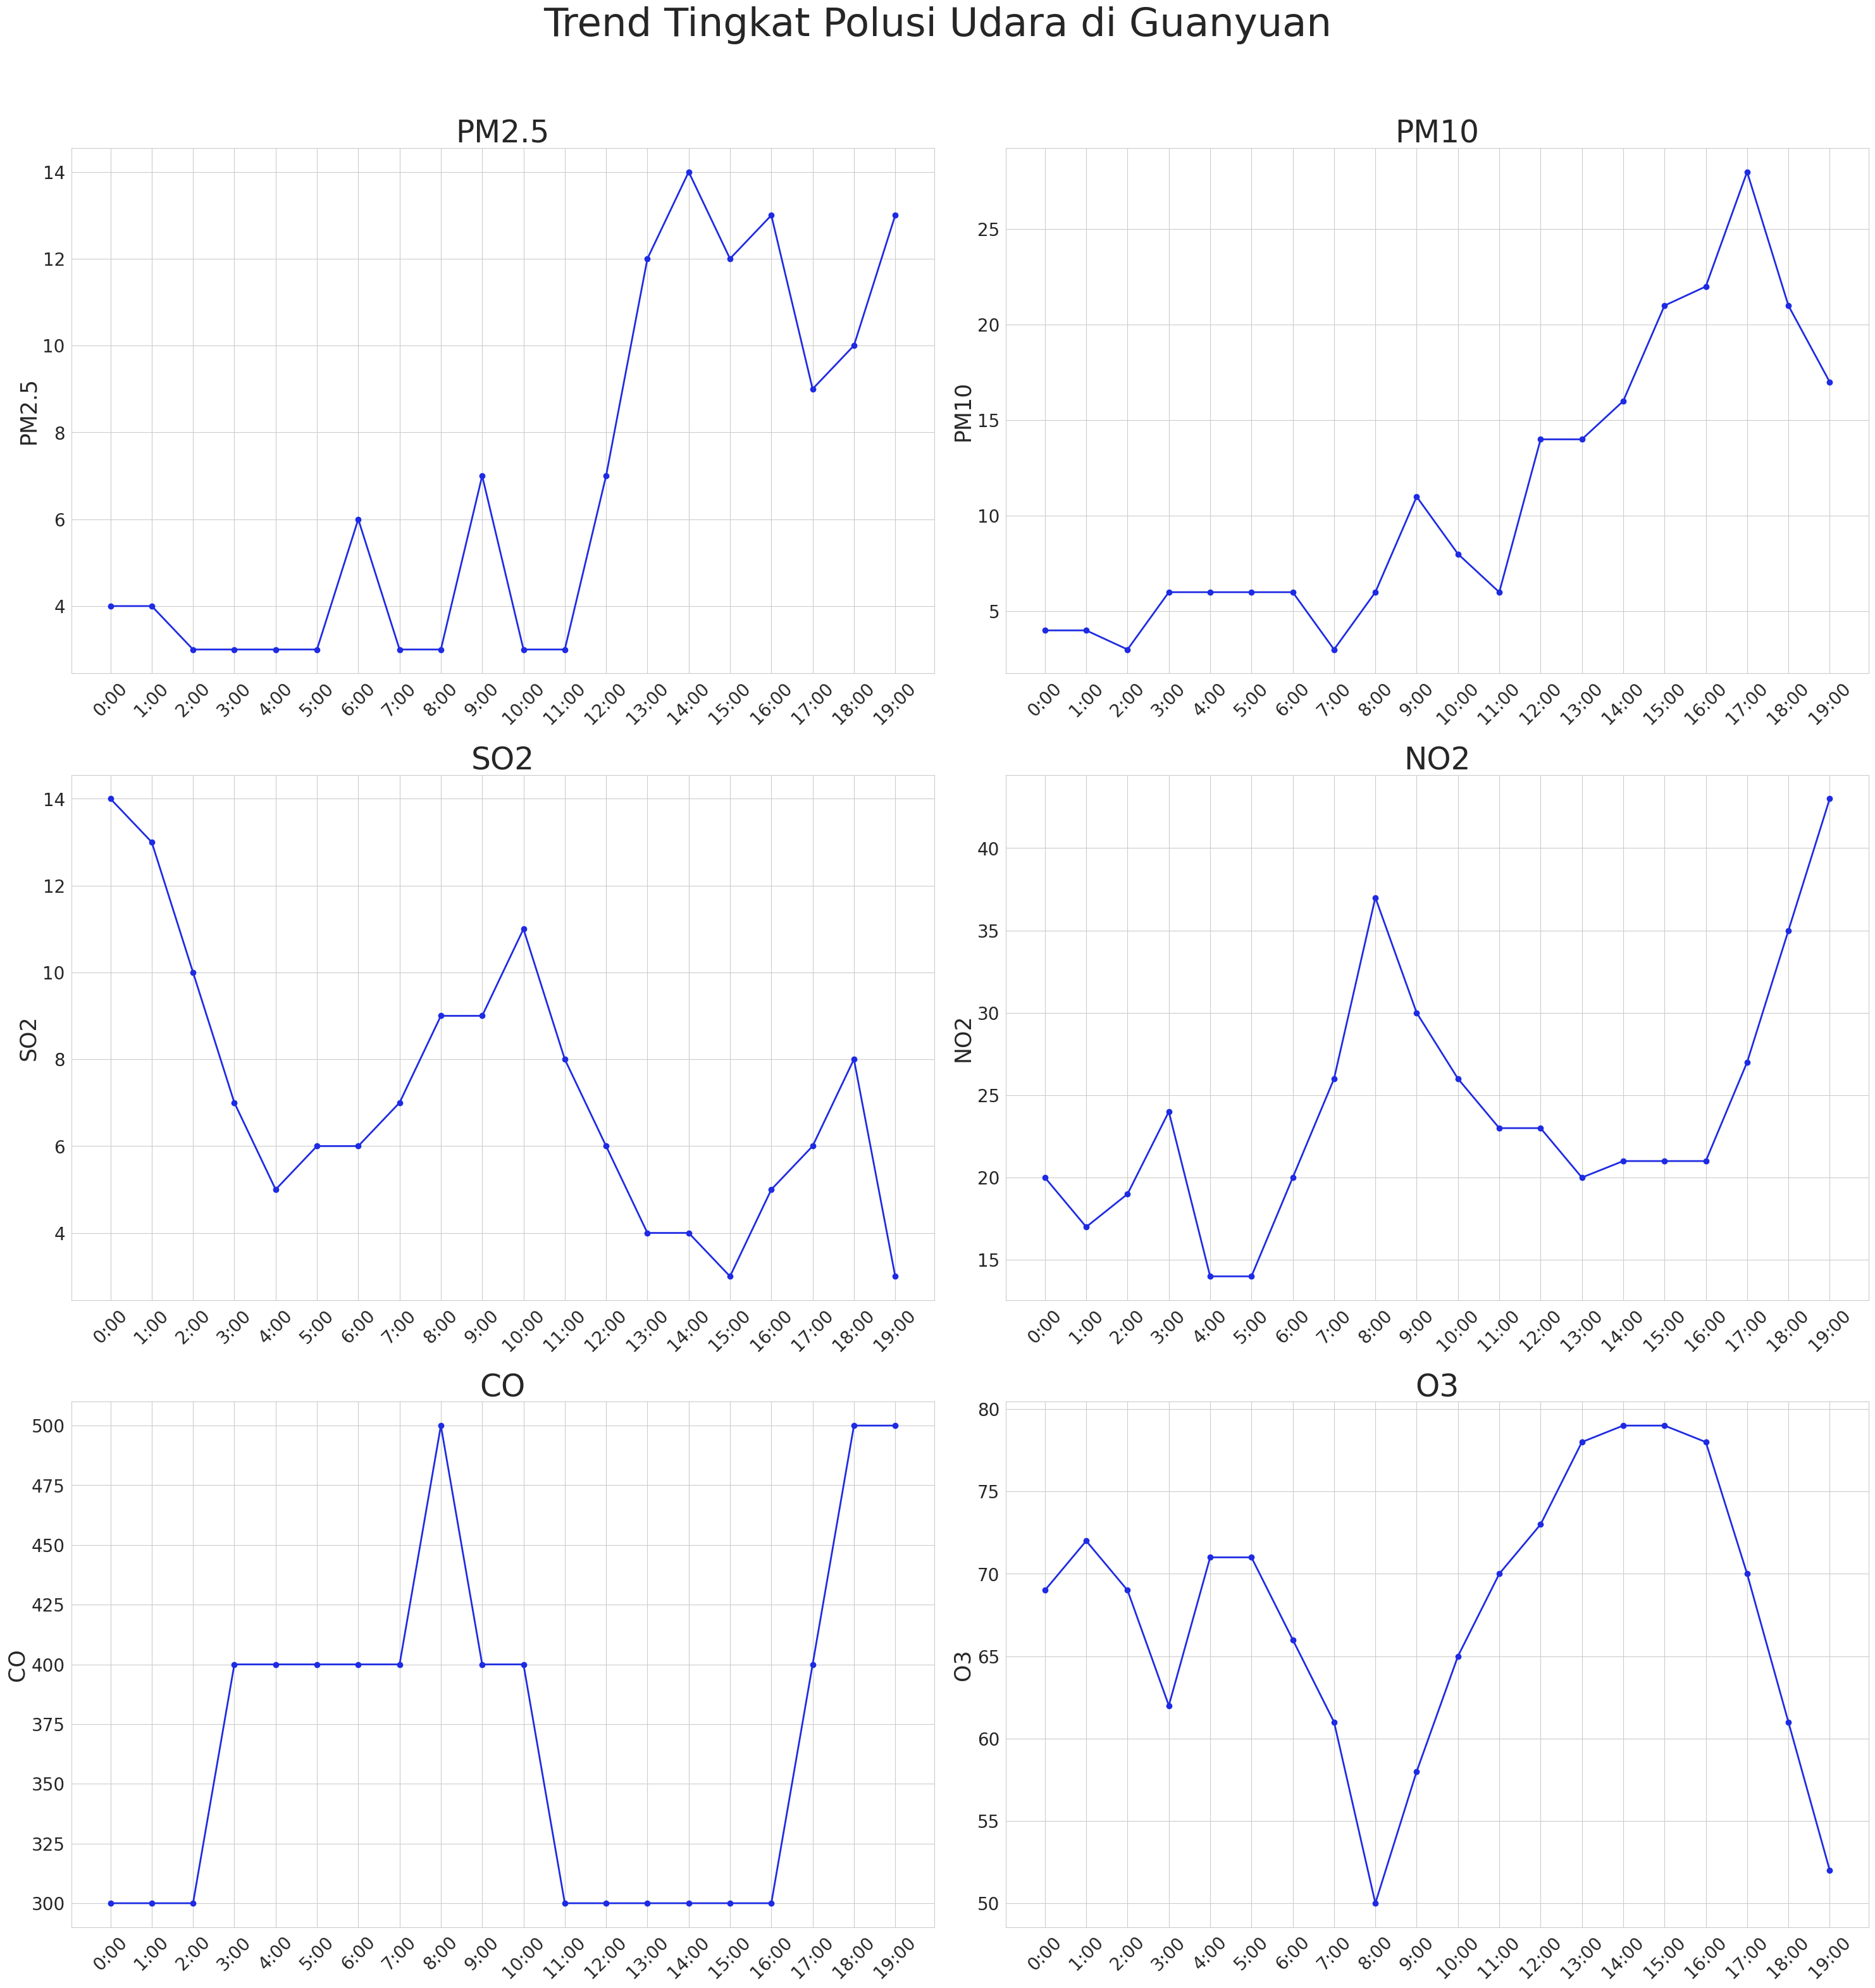

In [32]:
# Menampilkan grafik trend polusi 2013-03-01 pukul 00.00-19.00
air_polution_graph(air_polution_hour.head(20))

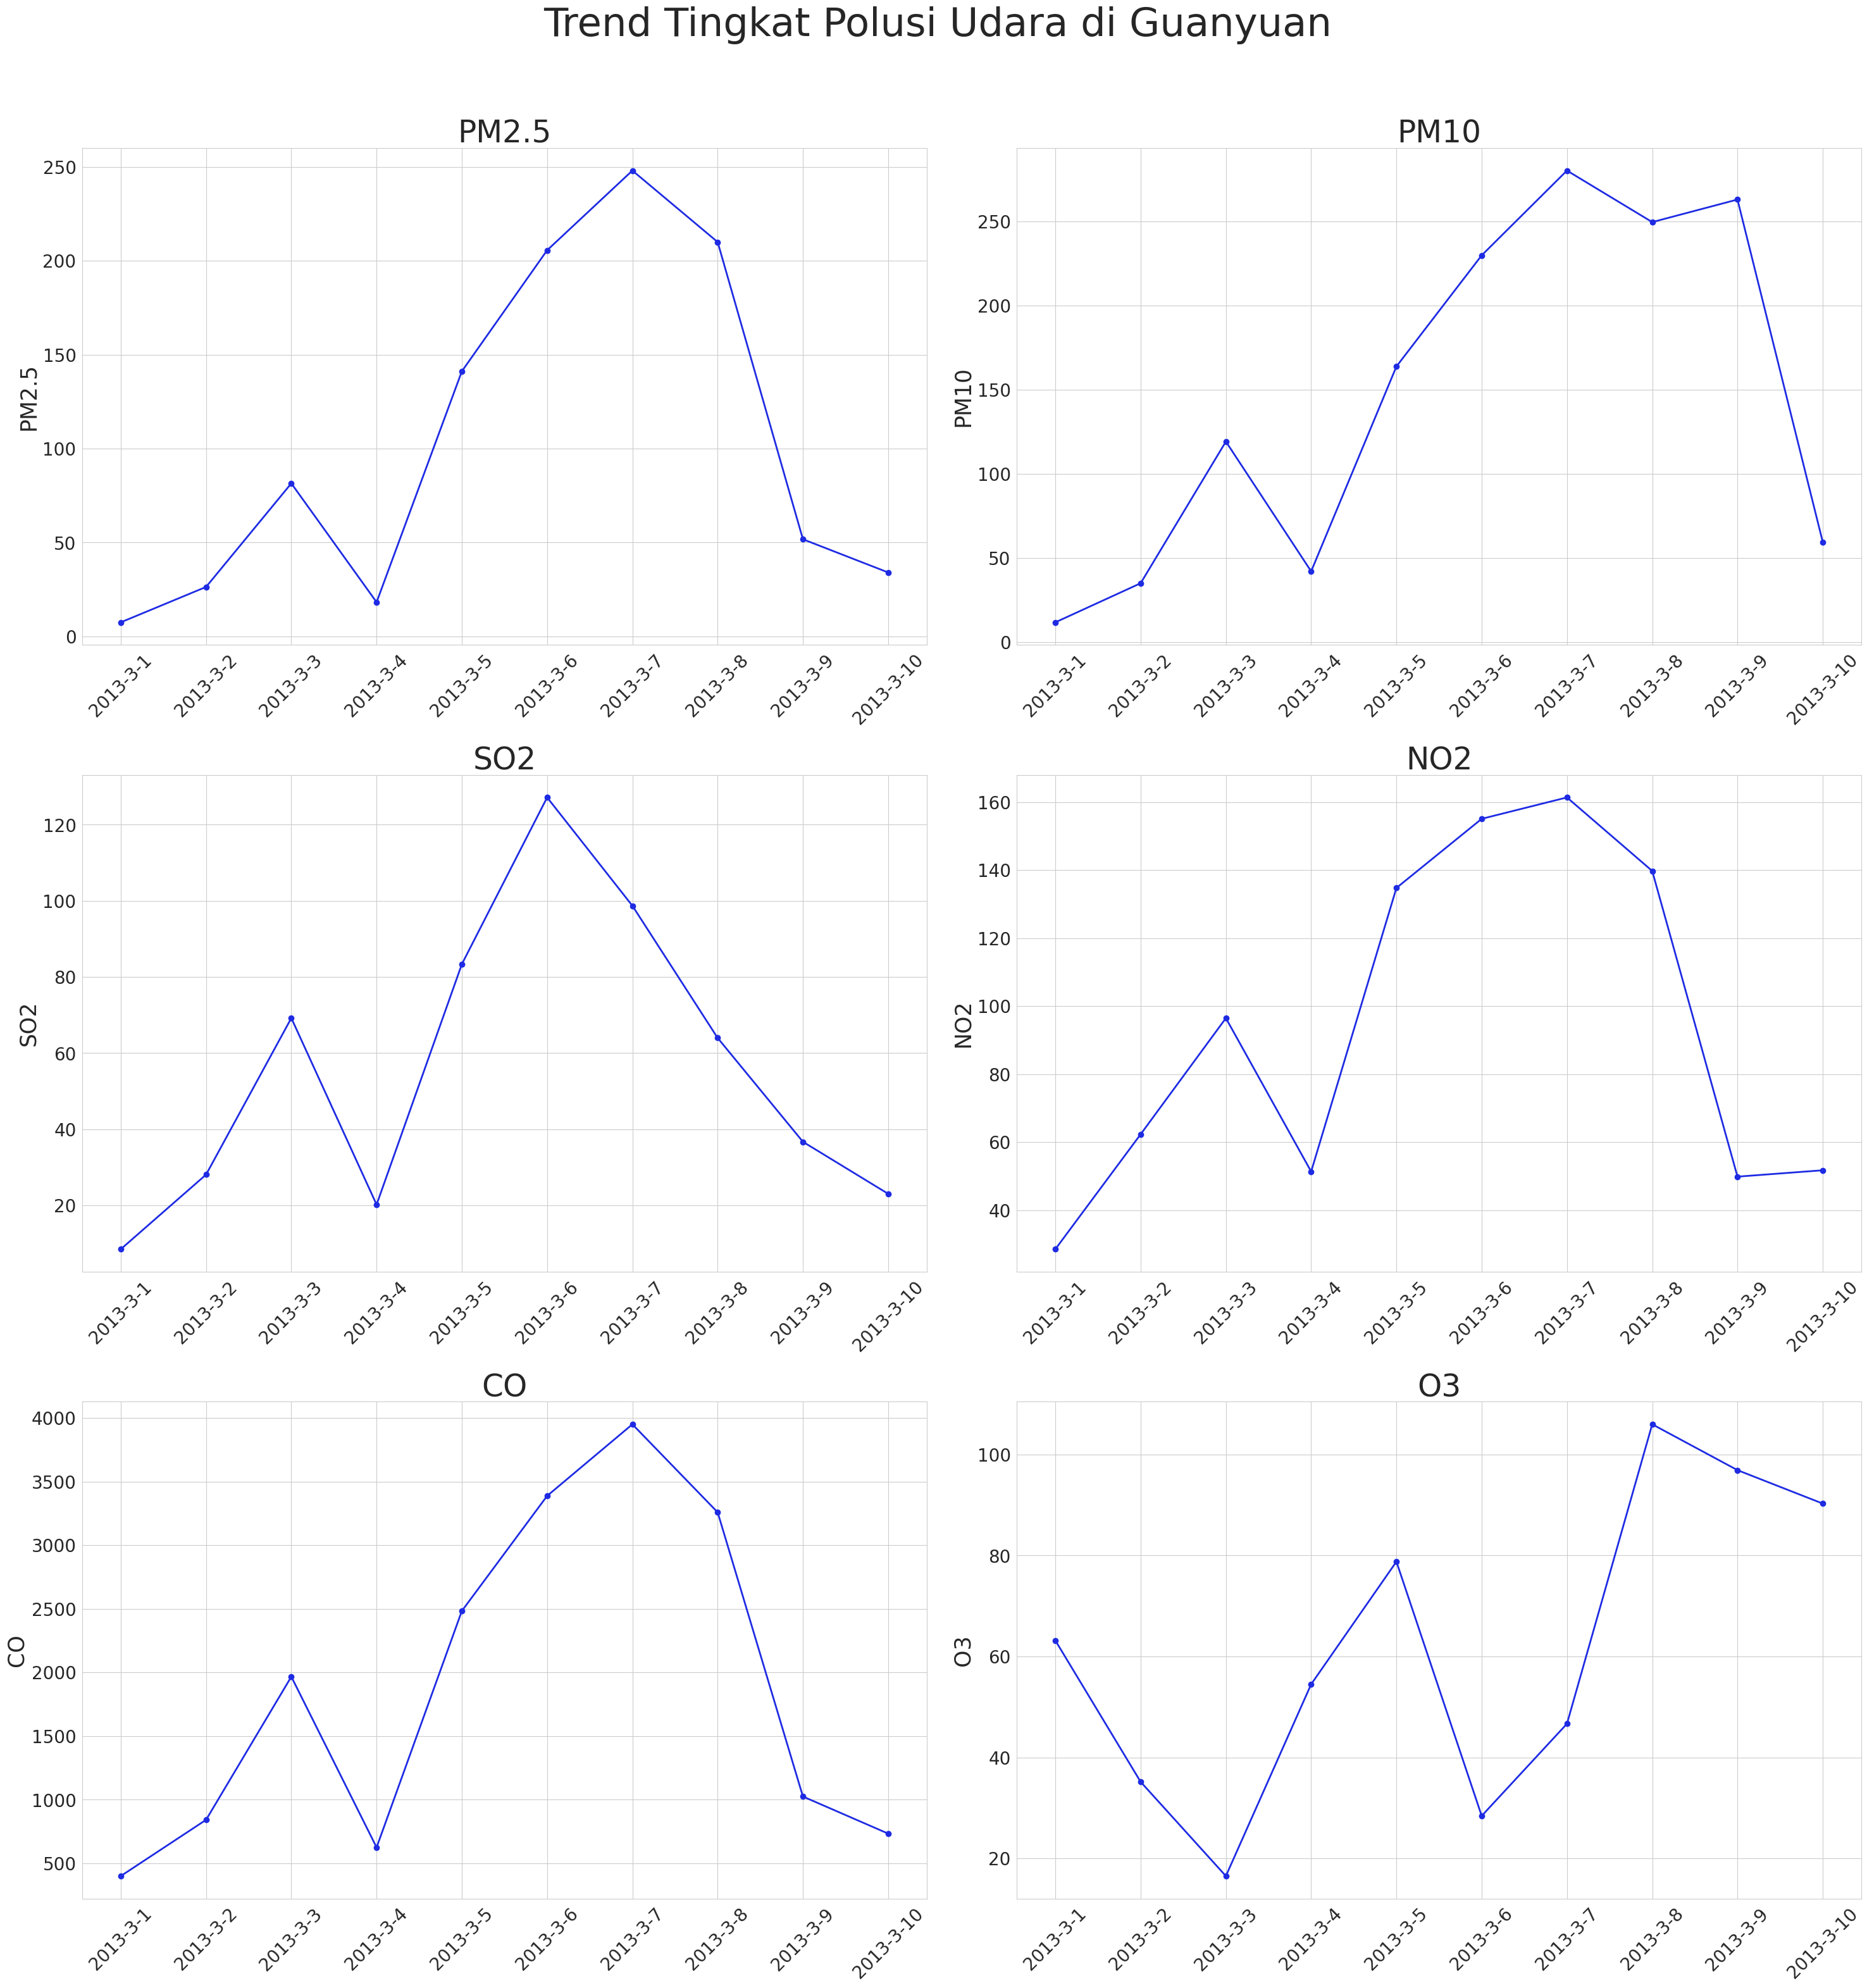

In [33]:
# Menampilkan grafik trend polusi 2013-03-01 sampai 2013-03-10
air_polution_graph(air_polution_day.head(10))

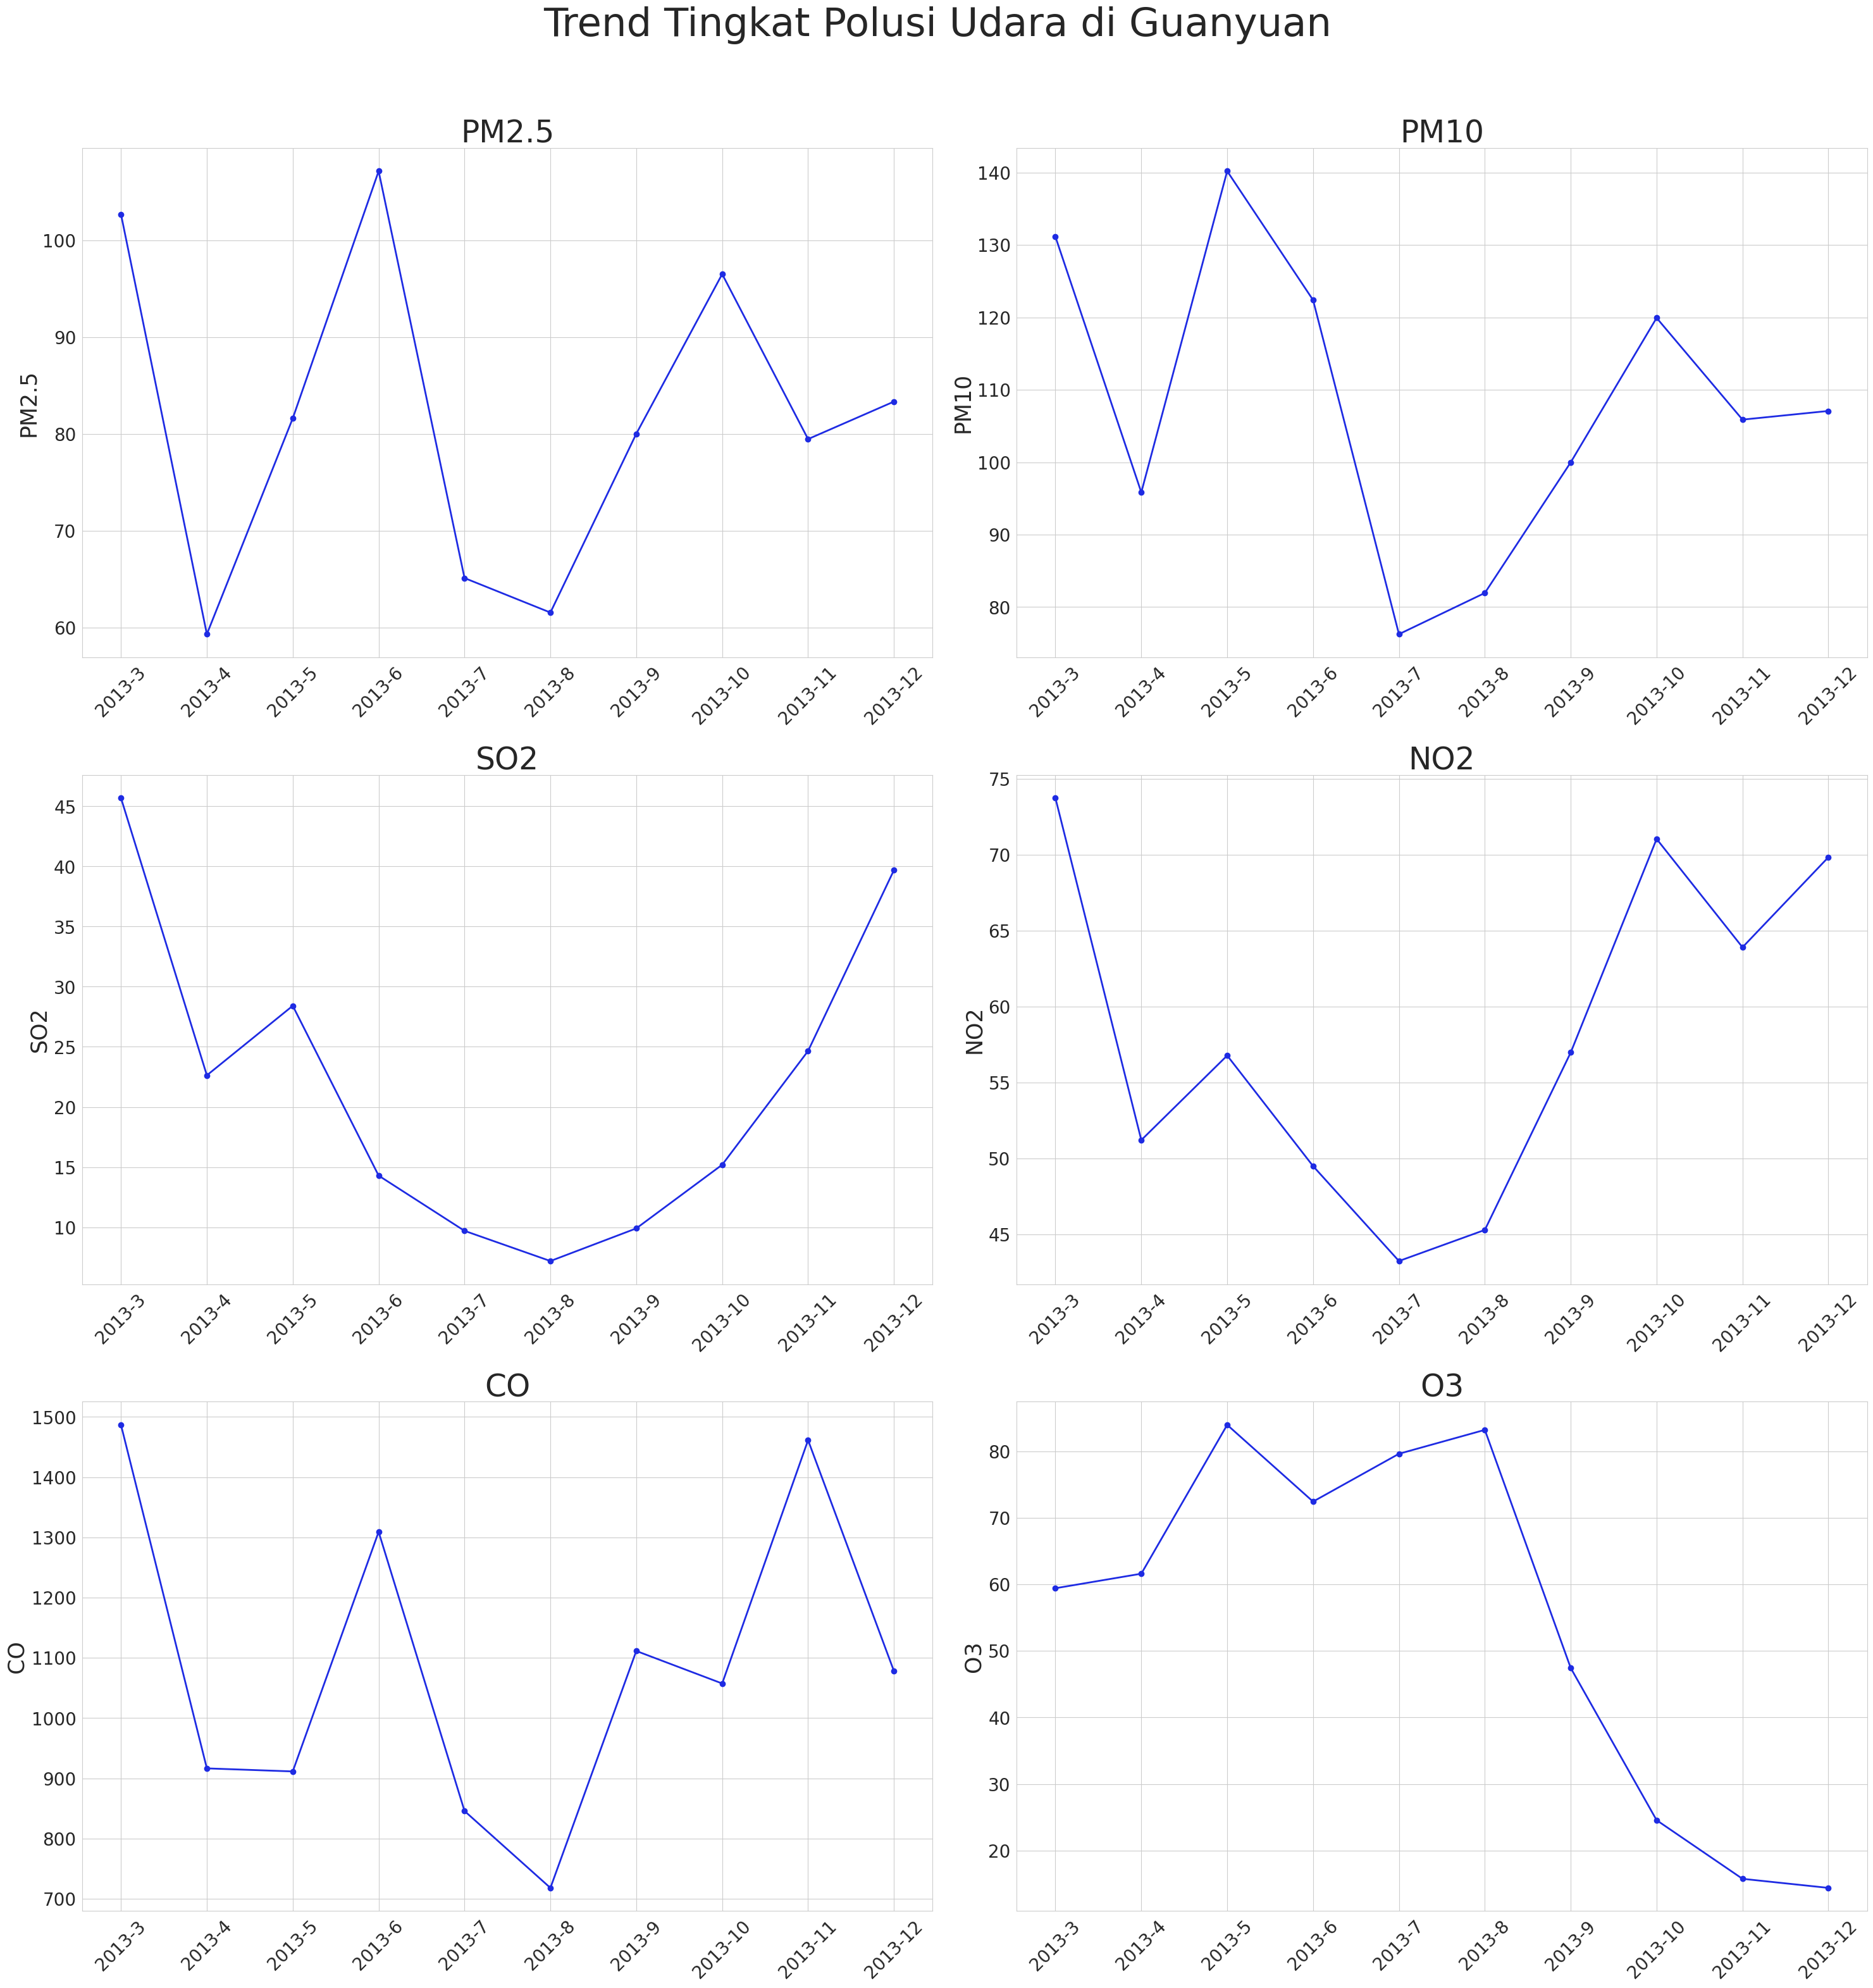

In [34]:
# Menampilkan grafik trend polusi 2013-03 sampai 2013-10
air_polution_graph(air_polution_month.head(10))

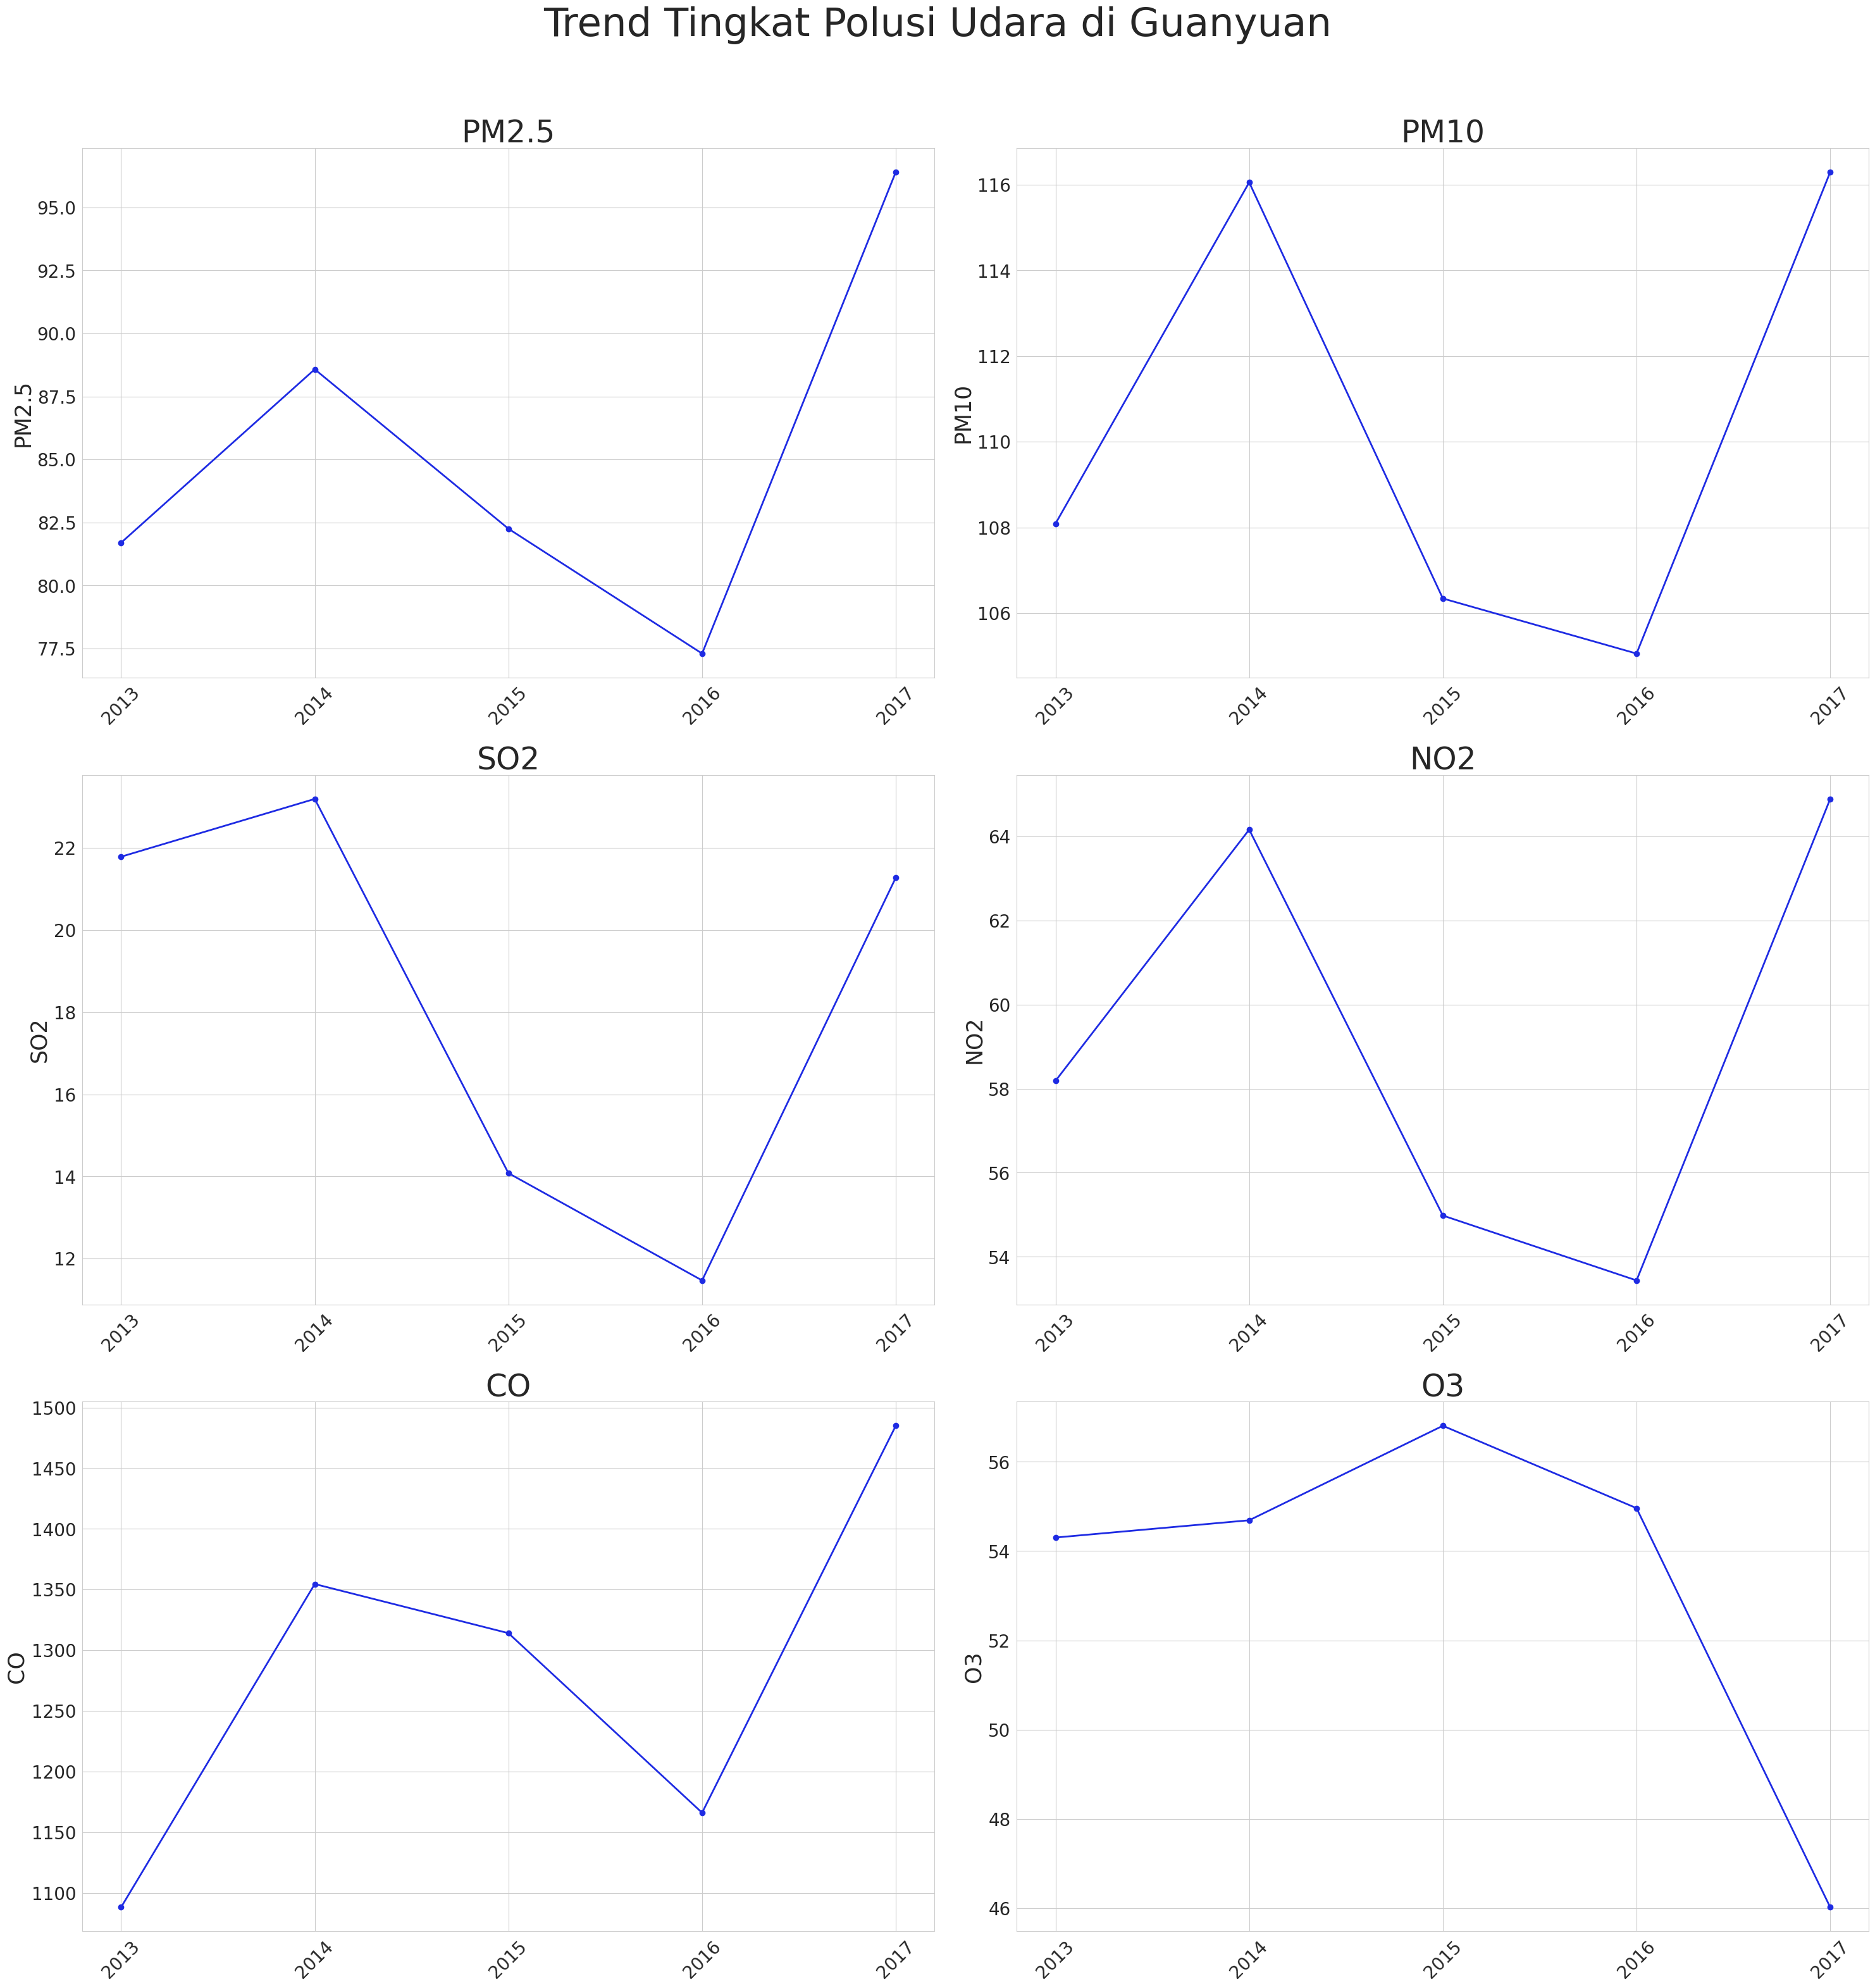

In [35]:
# Menampilkan grafik trend polusi 2013 sampai 2017
air_polution_graph(air_polution_year.head(10))

Pada masing masing hasil eksplorasi data ini, akan ditampilkan apakah ilai PM2.5 dan PM10 rata rata pada rentang waktu tersebut masih termasuk sehat atau tidak berdasarkan acuan BMKG. Untuk acuan batasnya sebagai berikut
1. PM2.5:
   - PM2.5 ≤ 15,5 Baik
   - 15,6 ≤ PM2.5 ≤ 55,4 Sedang
   - 55,5 ≤ PM2.5 ≤ 150,4 Tidak Sehat
   - 150,4 ≤ PM2.5 ≤ 250,4 Sangat Tidak Sehat
   - PM2.5 ≥ 250,5 Berbahaya
2. PM10:
   - PM10 ≤ 50 Baik
   - 51 ≤ PM10 ≤ 150 Sedang
   - 151 ≤ PM10 ≤ 350 Tidak Sehat
   - 351 ≤ PM10 ≤ 420 Sangat Tidak Sehat
   - PM10 ≥ 421 Berbahaya


Selain itu ditampilkan juga nilai rata rata dari tingkat SO2, NO2, CO2 dan O3. Proses dilakukan dengan menggunakan fungsi airpolution_show(df).

In [36]:
def airpolution_show(df):
    pm25= round(df['PM2.5'].mean(), 1)
    pm10= round(df['PM10'].mean(), 0)
    SO2= round(df['SO2'].mean(), 2)
    NO2= round(df['NO2'].mean(), 2)
    CO= round(df['CO'].mean(), 2)
    O3= round(df['O3'].mean(),2)

    if (pm25 <= 15.5):
      print("Rata-rata PM2.5: " + str(pm25) + "\n BAIK" )
    elif ((pm25 >= 15.6) & (pm25 <= 55.4)):
      print("Rata-rata PM2.5: " + str(pm25) + "\n SEDANG" )
    elif ((pm25 >= 55.5) & (pm25 <= 150.4)):
      print("Rata-rata PM2.5: " + str(pm25) + "\n TIDAK SEHAT" )
    elif ((pm25 >= 150.5) & (pm25 <= 250.4)):
      print("Rata-rata PM2.5: " + str(pm25)+ "\n SANGAT TIDAK SEHAT")
    else:
      print("Rata-rata PM2.5: " + str(pm25) + "\n BERBAHAYA" )

    if (pm10 <= 50):
      print("Rata-rata PM10: " + str(pm10) + "\n BAIK" )
    elif ((pm10  >= 51) & (pm10 <= 150)):
      print("Rata-rata PM10: " + str(pm10) + "\n SEDANG" )
    elif ((pm10  >= 151) & (pm10  <= 350)):
      print("Rata-rata PM10: " + str(pm10) + "\n TIDAK SEHAT" )
    elif ((pm10 >= 351) & (pm10 <= 420)):
      print("Rata-rata PM10: " + str(pm10) + "\n SANGAT TIDAK SEHAT" )
    else:
      print("Rata-rata PM10: " + str(pm10) + "\n BERBAHAYA" )

    print("Rata-rata SO2:"+ str(SO2))
    print("Rata-rata NO2:"+ str(NO2))
    print("Rata-rata CO:", str(CO))
    print("Rata-rata O3:", str(O3))

In [37]:
# Klasifikasi tingkat polusi pada 2013-03-01 pukul 00.00-19.00
print("Klasifikasi tingkat polusi pada 2013-03-01 pukul 00.00-19.00")
airpolution_show(air_polution_hour.head(20))

Klasifikasi tingkat polusi pada 2013-03-01 pukul 00.00-19.00
Rata-rata PM2.5: 6.8
 BAIK
Rata-rata PM10: 11.0
 BAIK
Rata-rata SO2:7.2
Rata-rata NO2:24.05
Rata-rata CO: 370.0
Rata-rata O3: 67.7


In [38]:
# Klasifikasi tingkat polusi pada 2013-03-01 sampai 2013-03-10
print("Klasifikasi tingkat polusi pada 2013-03-01 sampai 2013-03-10 ")
airpolution_show(air_polution_day.head(10))

Klasifikasi tingkat polusi pada 2013-03-01 sampai 2013-03-10 
Rata-rata PM2.5: 102.4
 TIDAK SEHAT
Rata-rata PM10: 145.0
 SEDANG
Rata-rata SO2:55.9
Rata-rata NO2:93.11
Rata-rata CO: 1866.92
Rata-rata O3: 61.64


In [39]:
# Klasifikasi tingkat polusi pada 2013-03 sampai 2013-10
print("Klasifikasi tingkat polusi pada 2013-03 sampai 2013-10")
airpolution_show(air_polution_month.head(10))

Klasifikasi tingkat polusi pada 2013-03 sampai 2013-10
Rata-rata PM2.5: 81.7
 TIDAK SEHAT
Rata-rata PM10: 108.0
 SEDANG
Rata-rata SO2:21.74
Rata-rata NO2:58.15
Rata-rata CO: 1089.56
Rata-rata O3: 54.24


In [40]:
# Klasifikasi tingkat polusi pada 2013 sampai 2017
print("Klasifikasi tingkat polusi pada 2013 sampai 2017")
airpolution_show(air_polution_year.head(5))

Klasifikasi tingkat polusi pada 2013 sampai 2017
Rata-rata PM2.5: 85.2
 TIDAK SEHAT
Rata-rata PM10: 110.0
 SEDANG
Rata-rata SO2:18.36
Rata-rata NO2:59.13
Rata-rata CO: 1281.54
Rata-rata O3: 53.36


### Pertanyaan 2: Bagaimana trend perubahan suhu dan tekanan udara di Guanyuan?


Pembuatan masing-masing grafik trend dilakukan dengan fungsi air_parameters_graph(df).

Masing-masing dataframe air_parameters_hour, air_parameters_day, air_parameters_month, dan air_parameters_year digunakan sebagai input. Ingat yang dimasukkan hanya sejumlah data awal sesuai pada tahapan eksplorasi.

In [41]:
def air_parameters_graph(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    ax[0].plot(df['time'], df['TEMP'], marker='o', linewidth=2, color="#1e2be3")
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0].set_ylabel("Suhu (°C)", fontsize=25)
    ax[0].set_title("Suhu", loc="center", fontsize=35)

    ax[1].plot(df['time'], df['PRES'], marker='o', linewidth=2, color="#1e2be3")
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1].set_ylabel("Tekanan (hPa)", fontsize=25)
    ax[1].set_title("Tekanan", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Perubahan Suhu dan Tekanan Udara di Guanyuan", fontsize=45, y=1.05)
    plt.show()

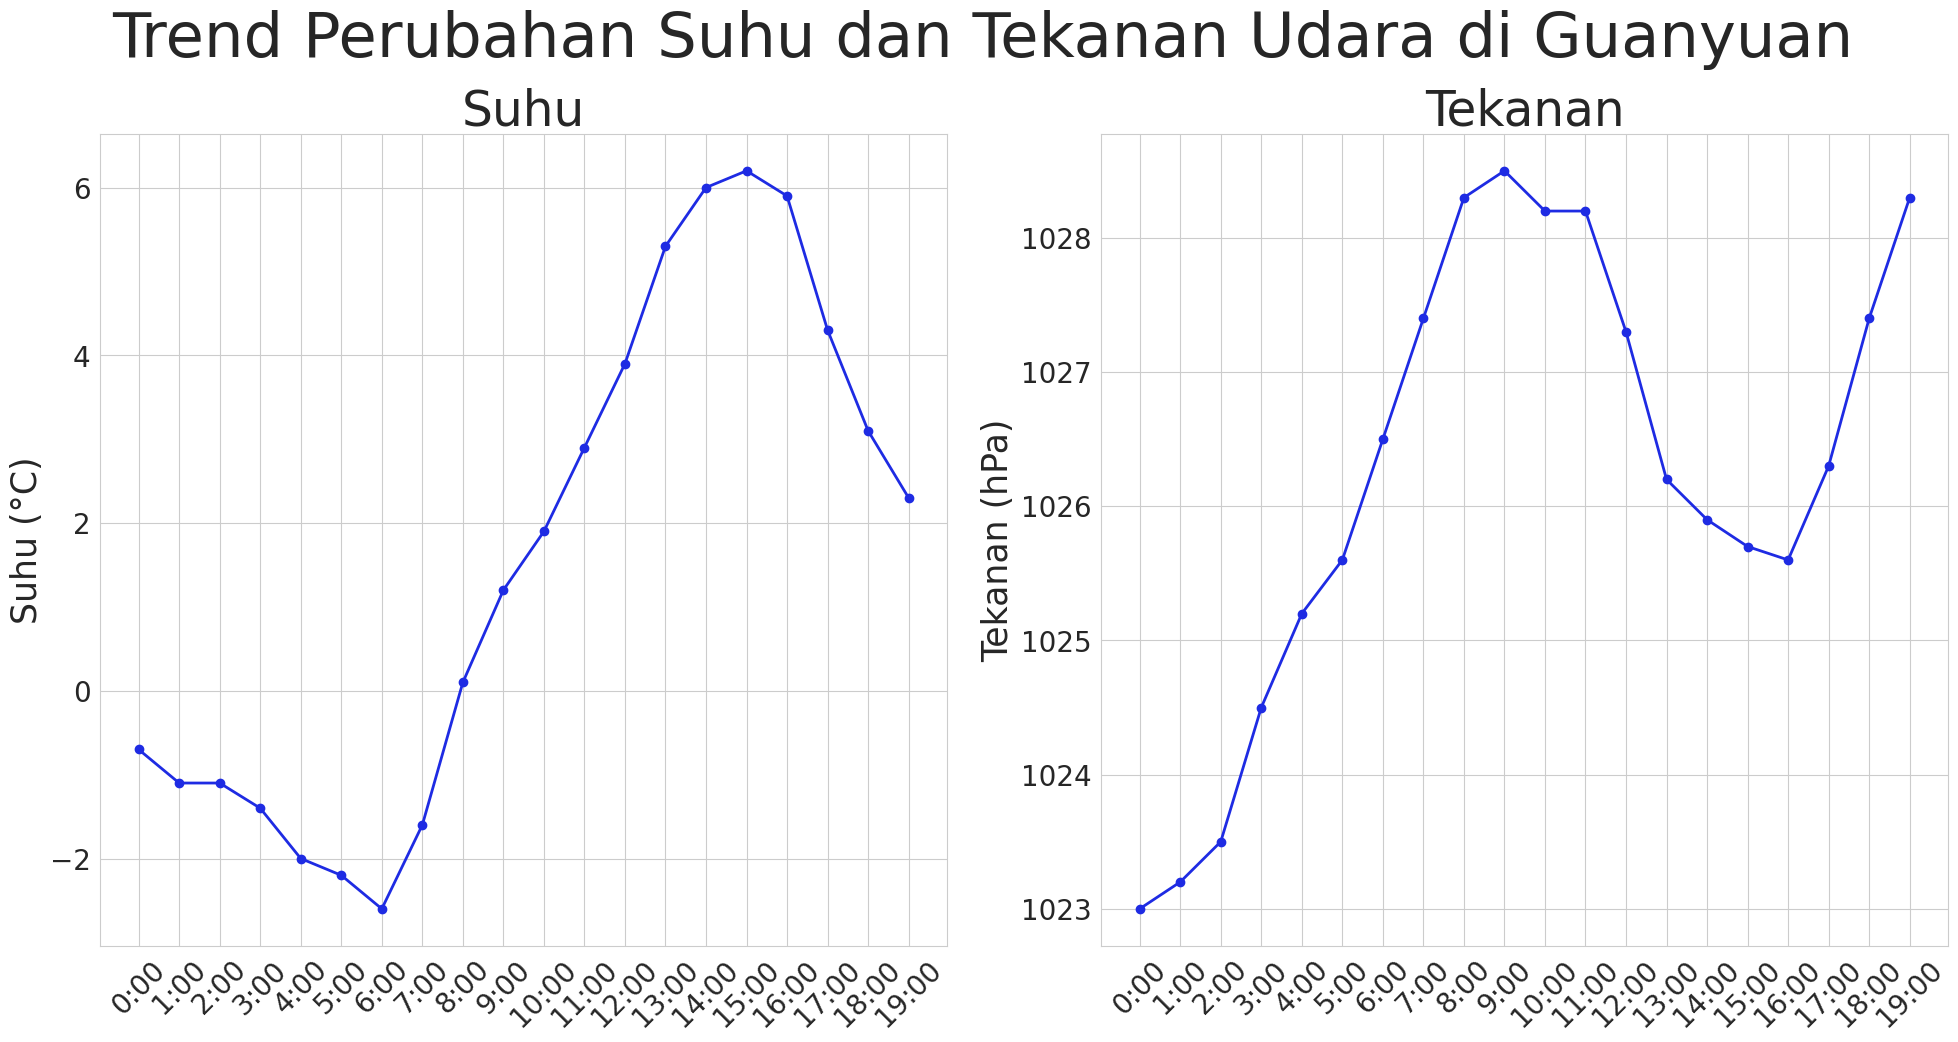

In [42]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013-03-01 pukul 00.00-19.00
air_parameters_graph(air_parameters_hour.head(20))

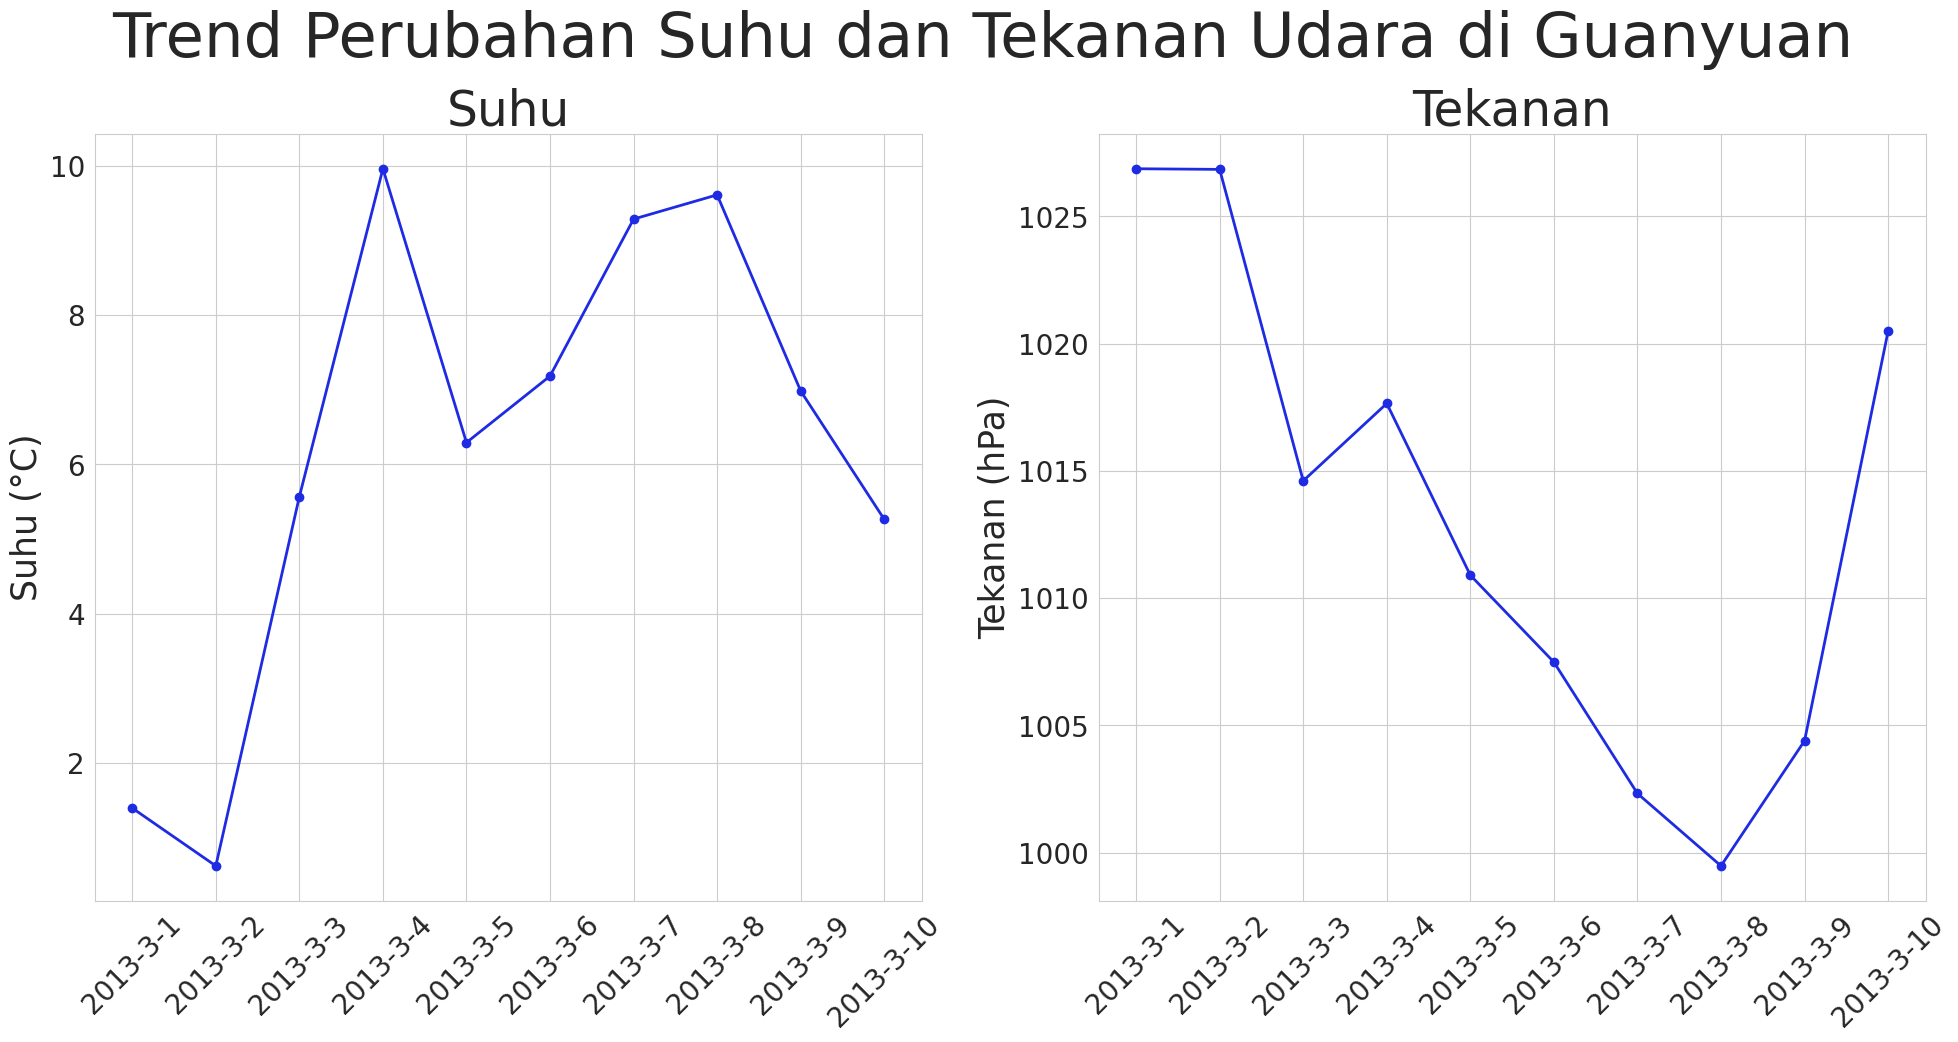

In [43]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013-03-01 sampai 2013-03-10
air_parameters_graph(air_parameters_day.head(10))

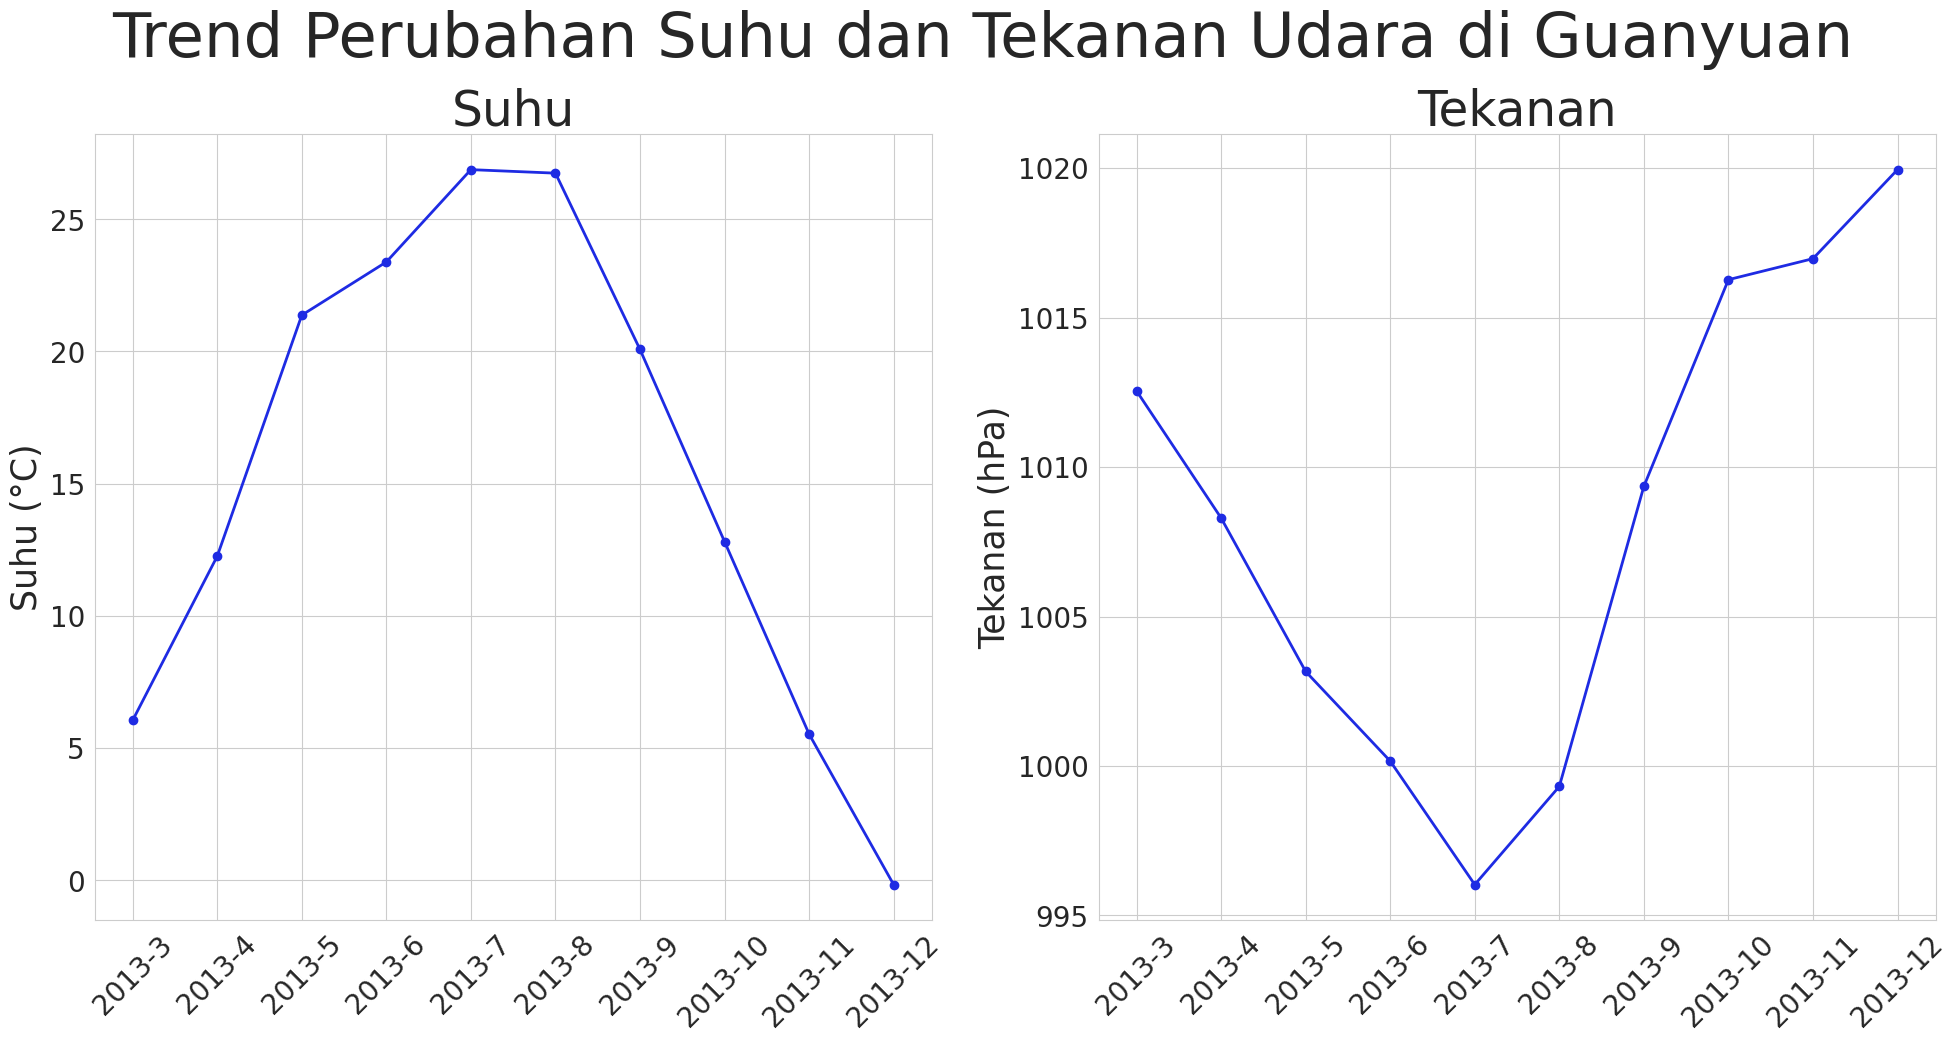

In [44]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013-03 sampai 2013-10
air_parameters_graph(air_parameters_month.head(10))

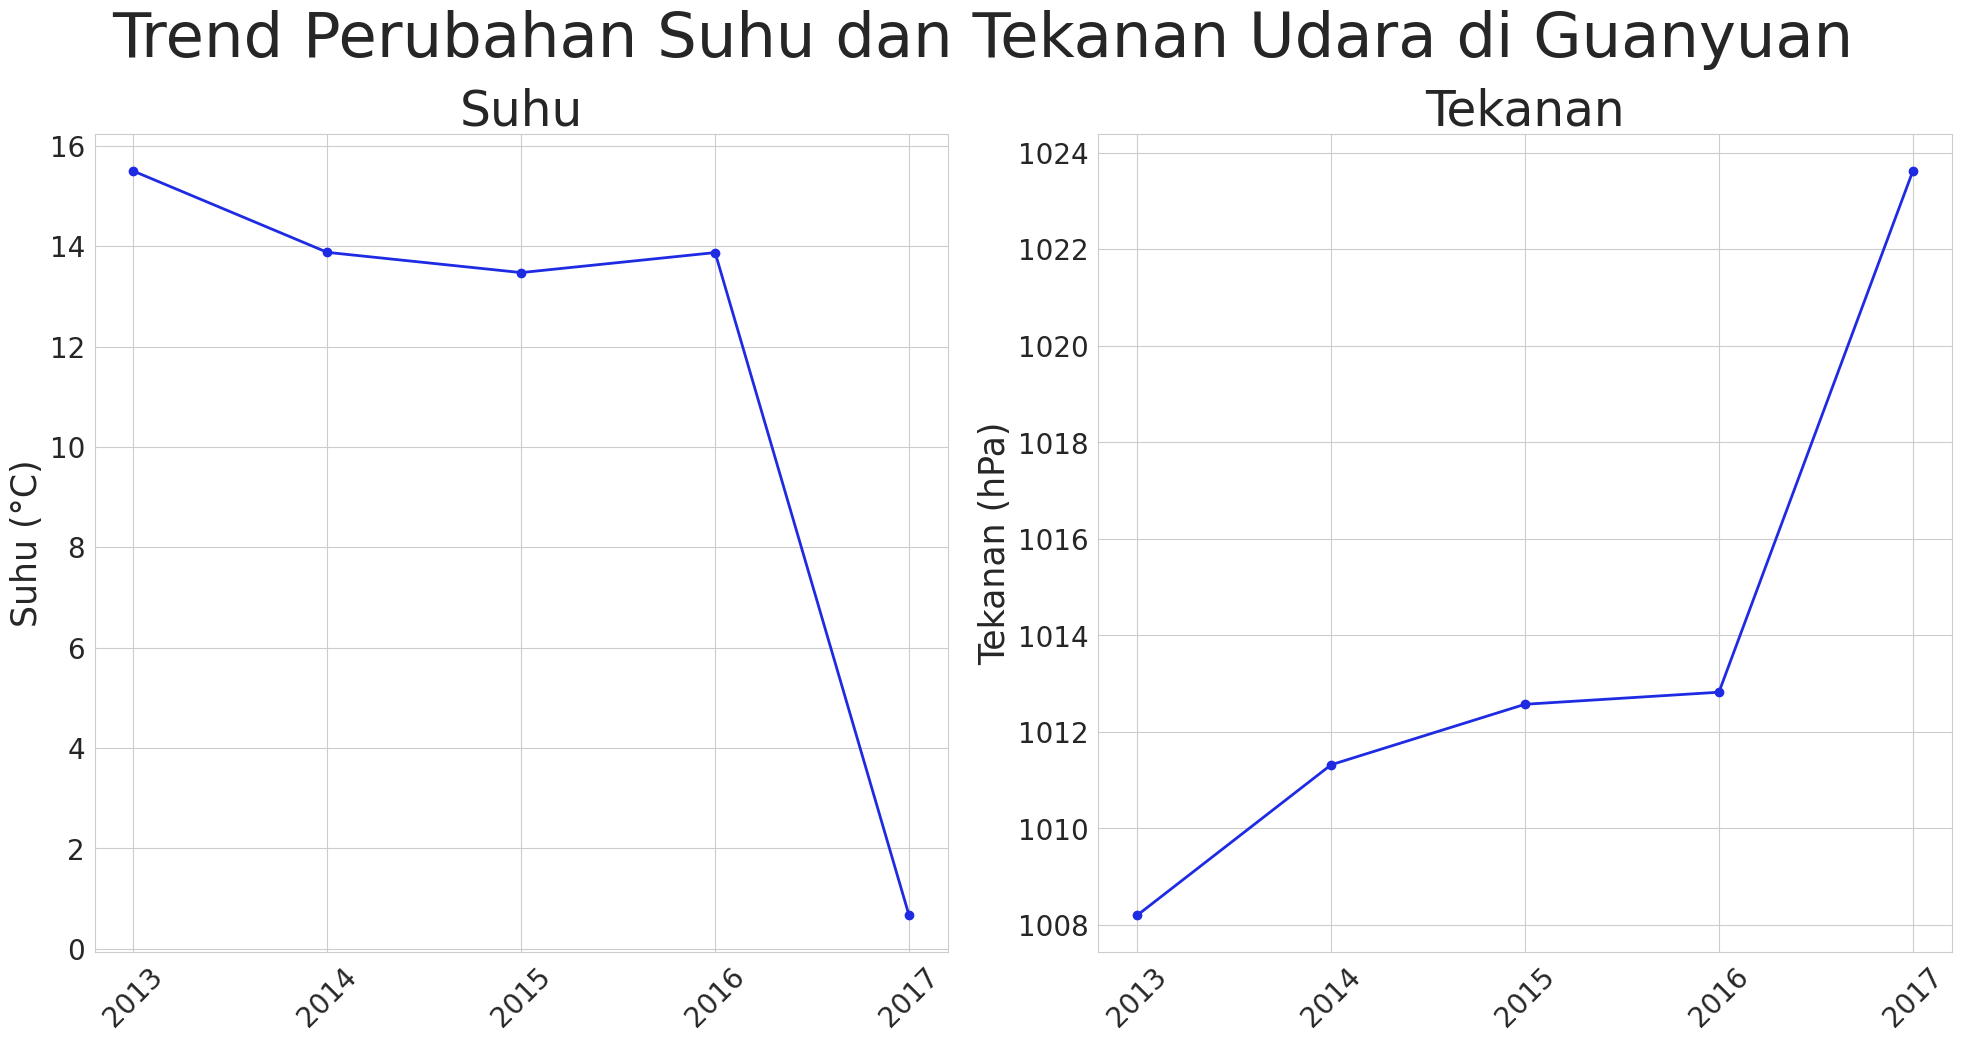

In [45]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013 sampai 2017
air_parameters_graph(air_parameters_year.head(5))

Selanjutnya juga ditunjukkan perhitungan rata-rata suhu dan tekanan udara dari masing-masing rentang waktu tersebut dengan fungsi airparameters_show().

In [46]:
def airparameters_show(df):
    suhu= round(df['TEMP'].mean(), 2)
    tekanan= round(df['PRES'].mean(), 2)

    print("Rata-rata suhu:", str(suhu) + " °C")
    print("Rata-rata tekanan:", str(tekanan) + " hPa")

In [47]:
#  Rata-rata suhu dan tekanan udara pada 2013-03-01 pukul 00.00-19.00
print("2013-03-01 pukul 00.00-19.00 \n")
airparameters_show(air_parameters_hour.head(20))

2013-03-01 pukul 00.00-19.00 

Rata-rata suhu: 1.52 °C
Rata-rata tekanan: 1026.24 hPa


In [48]:
#  Rata-rata suhu dan tekanan udara pada 2013-03-01 sampai 2013-03-10
print("2013-03-01 sampai 2013-03-10 \n")
airparameters_show(air_parameters_day.head(10))

2013-03-01 sampai 2013-03-10 

Rata-rata suhu: 6.22 °C
Rata-rata tekanan: 1013.1 hPa


In [49]:
#  Rata-rata suhu dan tekanan udara pada 2013-03 sampai 2013-10
print("2013-03 sampai 2013-10 \n")
airparameters_show(air_parameters_month.head(10))

2013-03 sampai 2013-10 

Rata-rata suhu: 15.5 °C
Rata-rata tekanan: 1008.21 hPa


In [50]:
#  Rata-rata suhu dan tekanan udara pada 2013 sampai 2017
print("2013 sampai 2017 \n")
airparameters_show(air_parameters_year.head(5))

2013 sampai 2017 

Rata-rata suhu: 11.48 °C
Rata-rata tekanan: 1013.71 hPa


### Pertanyaan 3: Bagaimana pengaruh tingkat polusi udara dengan perubahan suhu dan tekanan di Guanyuan?


Dengan menggunakan data eksplorasi perhitungan korelasi dengan metode pearson yang sudah dilakukan pada tahap eksplorasi, maka dapat kita tampilkan grafik korelasi antara tingkat polusi udara dengan perubahan suhu dan tekanan udara. Grafik korelasi ini dapat ditampilkan dalam bentuk heatmap maupun scatter plot

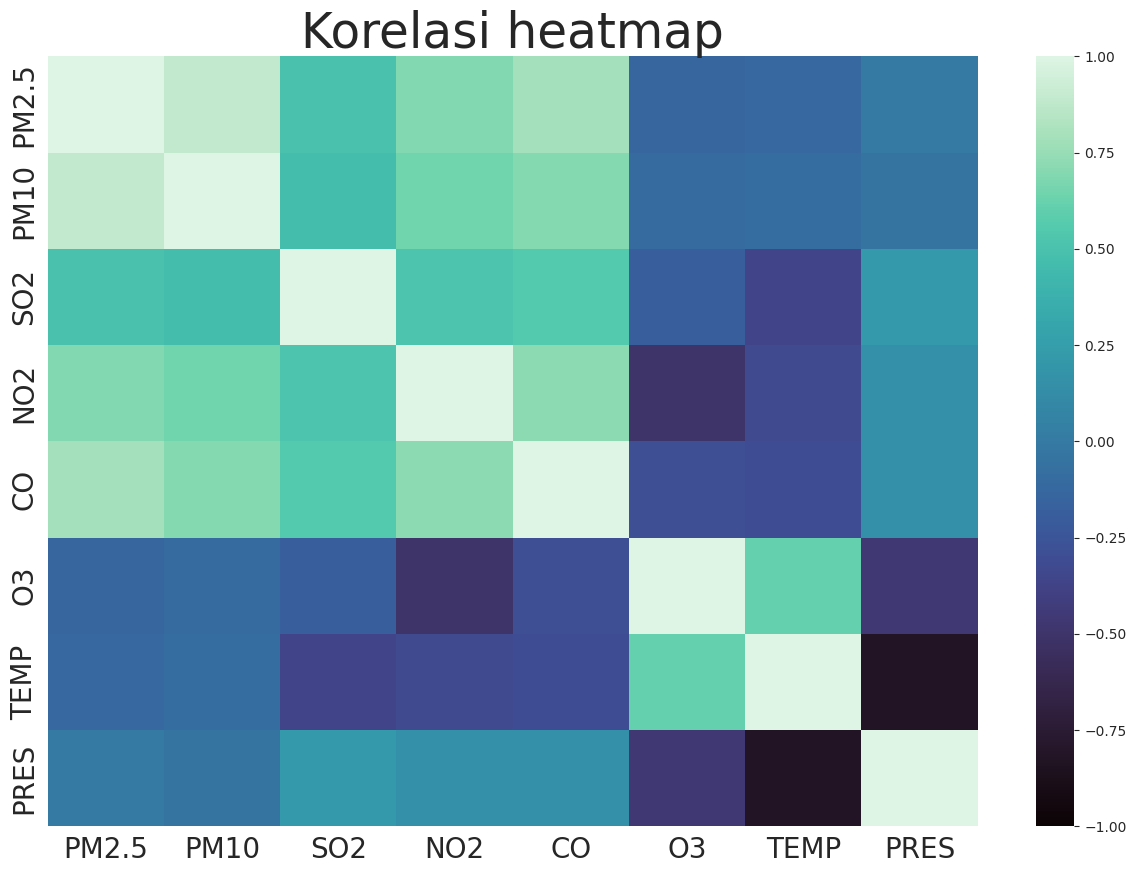

In [51]:
# Tampilan grafik korelasi heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(korelasi, vmax = 1, vmin = -1, center = 0, cmap = "mako")
ax.tick_params(labelsize = 20)
ax.set_title("Korelasi heatmap", loc="center", fontsize=35)

plt.show()

Tampilan grafik scatter plot dengan menggunakan fungsi corr_scatter_graph(df) dengan input dataframe correlation_df

In [52]:
# Tampilan grafik scatter plot dengan menggunakan fungsi corr_scatter_graph(df)
def corr_scatter_graph(df):
    fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

    ax1[0,0].scatter(df['TEMP'], df['PM2.5'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax1[0,0].set_xticklabels([])
    ax1[0,0].set_yticklabels([])
    ax1[0,0].set_xlabel("SUHU", fontsize = 20)
    ax1[0,0].set_ylabel("PM2.5", fontsize = 20)

    ax1[0,1].scatter(df['TEMP'], df['PM10'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax1[0,1].set_xticklabels([])
    ax1[0,1].set_yticklabels([])
    ax1[0,1].set_xlabel("SUHU", fontsize = 20)
    ax1[0,1].set_ylabel("PM10", fontsize = 20)

    ax1[1,0].scatter(df['TEMP'], df['SO2'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax1[1,0].set_xticklabels([])
    ax1[1,0].set_yticklabels([])
    ax1[1,0].set_xlabel("SUHU", fontsize = 20)
    ax1[1,0].set_ylabel("SO2", fontsize = 20)

    ax1[1,1].scatter(df['TEMP'], df['NO2'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax1[1,1].set_xticklabels([])
    ax1[1,1].set_yticklabels([])
    ax1[1,1].set_xlabel("SUHU", fontsize = 20)
    ax1[1,1].set_ylabel("NO2", fontsize = 20)

    ax1[2,0].scatter(df['TEMP'], df['CO'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax1[2,0].set_xticklabels([])
    ax1[2,0].set_yticklabels([])
    ax1[2,0].set_xlabel("SUHU", fontsize = 20)
    ax1[2,0].set_ylabel("CO", fontsize = 20)

    ax1[2,1].scatter(df['TEMP'], df['O3'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax1[2,1].set_xticklabels([])
    ax1[2,1].set_yticklabels([])
    ax1[2,1].set_xlabel("SUHU", fontsize = 20)
    ax1[2,1].set_ylabel("O3", fontsize = 20)

    fig1.tight_layout(pad=2.0)

    plt.suptitle("Tingkat Polusi Udara VS Suhu", fontsize=45, y=1.05)
    plt.show(fig1)

    fig2, ax2 = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

    ax2[0,0].scatter(df['PRES'], df['PM2.5'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax2[0,0].set_xticklabels([])
    ax2[0,0].set_yticklabels([])
    ax2[0,0].set_xlabel("TEKANAN", fontsize = 20)
    ax2[0,0].set_ylabel("PM2.5", fontsize = 20)

    ax2[0,1].scatter(df['PRES'], df['PM10'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax2[0,1].set_xticklabels([])
    ax2[0,1].set_yticklabels([])
    ax2[0,1].set_xlabel("TEKANAN", fontsize = 20)
    ax2[0,1].set_ylabel("PM10", fontsize = 20)

    ax2[1,0].scatter(df['PRES'], df['SO2'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax2[1,0].set_xticklabels([])
    ax2[1,0].set_yticklabels([])
    ax2[1,0].set_xlabel("TEKANAN", fontsize = 20)
    ax2[1,0].set_ylabel("SO2", fontsize = 20)

    ax2[1,1].scatter(df['PRES'], df['NO2'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax2[1,1].set_xticklabels([])
    ax2[1,1].set_yticklabels([])
    ax2[1,1].set_xlabel("TEKANAN", fontsize = 20)
    ax2[1,1].set_ylabel("NO2", fontsize = 20)

    ax2[2,0].scatter(df['PRES'], df['CO'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax2[2,0].set_xticklabels([])
    ax2[2,0].set_yticklabels([])
    ax2[2,0].set_xlabel("TEKANAN", fontsize = 20)
    ax2[2,0].set_ylabel("CO", fontsize = 20)

    ax2[2,1].scatter(df['PRES'], df['O3'],s = 5, alpha = 0.5, c = "#1e2be3",marker = 'o', edgecolors= "#ed7d53")
    ax2[2,1].set_xticklabels([])
    ax2[2,1].set_yticklabels([])
    ax2[2,1].set_xlabel("TEKANAN", fontsize = 20)
    ax2[2,1].set_ylabel("O3", fontsize = 20)

    fig2.tight_layout(pad=2.0)

    plt.suptitle("Tingkat Polusi Udara VS Tekanan", fontsize=45, y=1.05)
    plt.show(fig2)

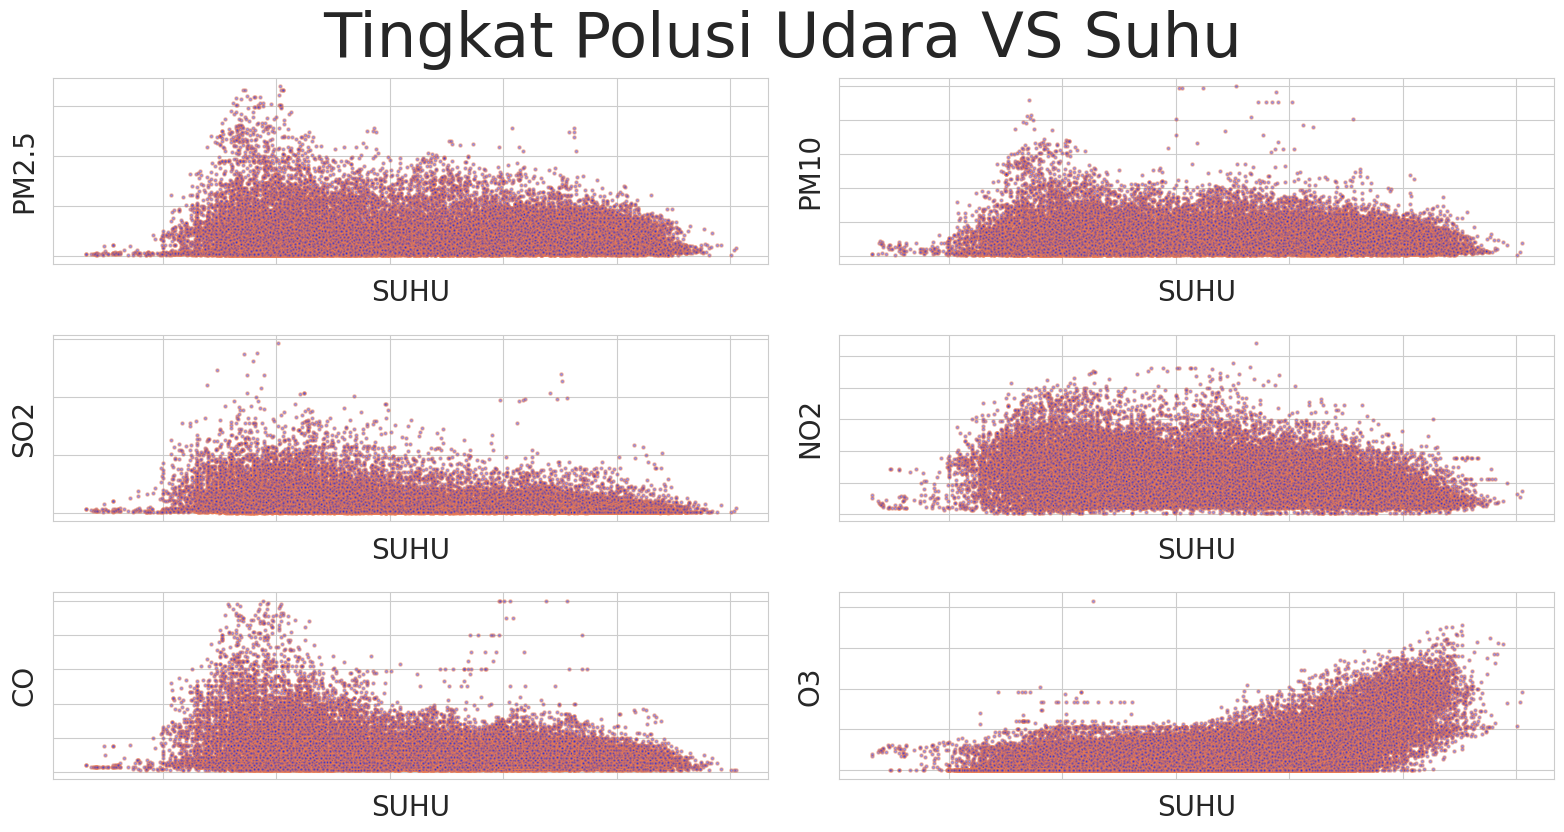

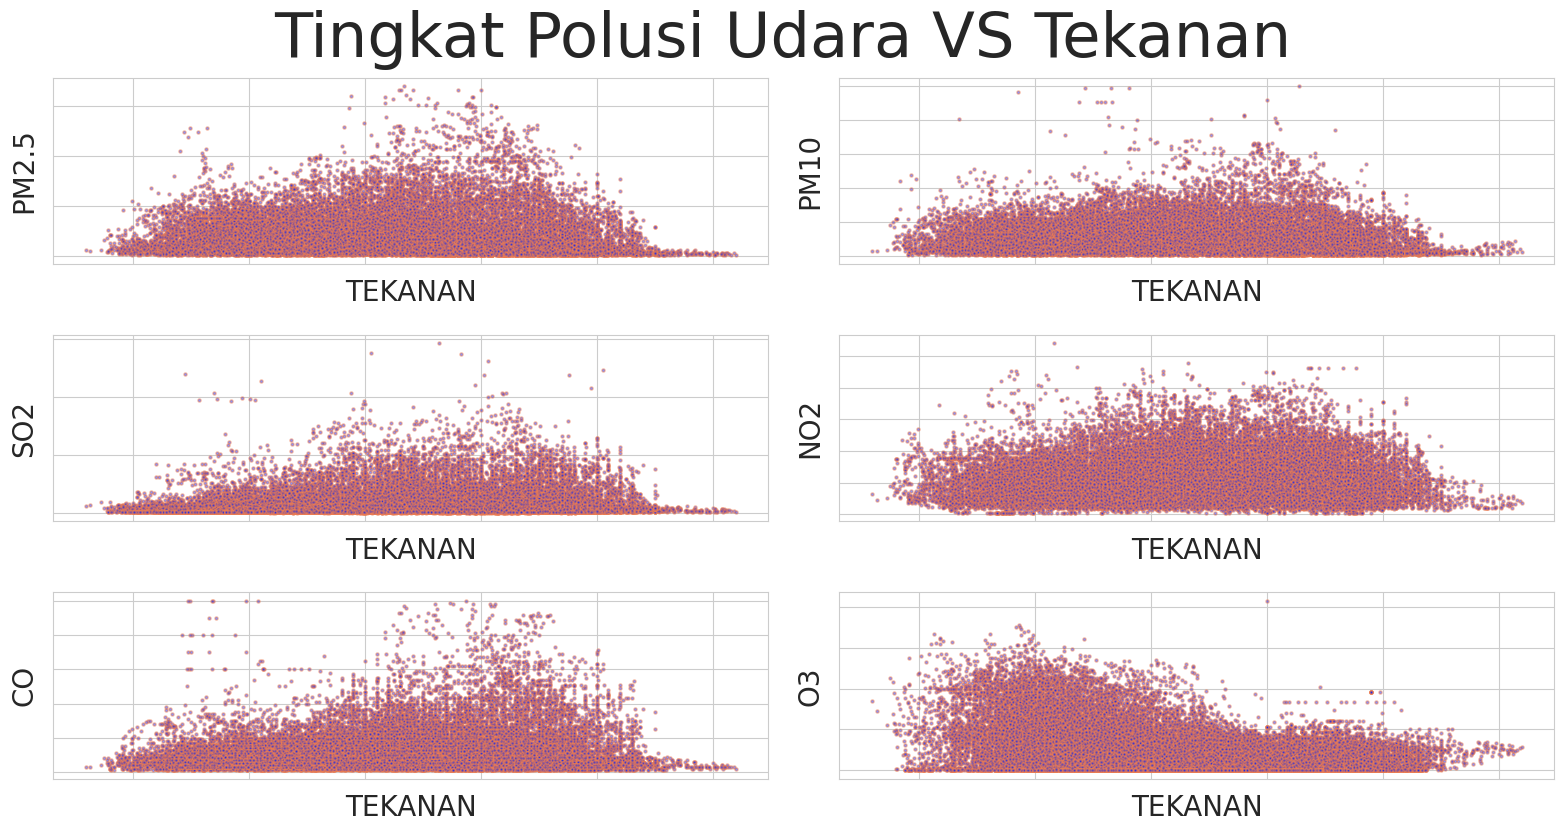

In [53]:
corr_scatter_graph(correlation_df)

### Pertanyaan 4: Pada rentang waktu apa tingkat partikel yang ada di udara di kota Guanyuan cenderung tinggi?


Dengan menggunakan timespan_bar_graph(df) dilakukan visualisasi data dari input berupa dataframe timespan_particle_df

In [54]:
def timespan_bar_graph(df):
    warna = ['#8AC0EA', '#538EC2','#66666F','#424756']
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    p = sns.barplot(data= df, x= df['time_span'], y= df['PM2.5'], palette= warna, ax= ax[0], orient= 'v')
    p.tick_params(axis='y', labelsize=20)
    p.tick_params(axis='x', labelsize=20)
    p.set_xlabel(None)
    p.set_ylabel("PM2.5", fontsize = 20)

    p= sns.barplot(data= df, x = df['time_span'], y= df['PM10'], palette= warna, ax=ax[1], orient = 'v')
    p.tick_params(axis='y', labelsize=20)
    p.tick_params(axis='x', labelsize=20)
    p.set_xlabel(None)
    p.set_ylabel("PM10", fontsize = 20)

    plt.suptitle("Tingkat Polusi di Guanyuan berdasarkan Rentang Waktu", fontsize=45, y=1.05)
    plt.show()

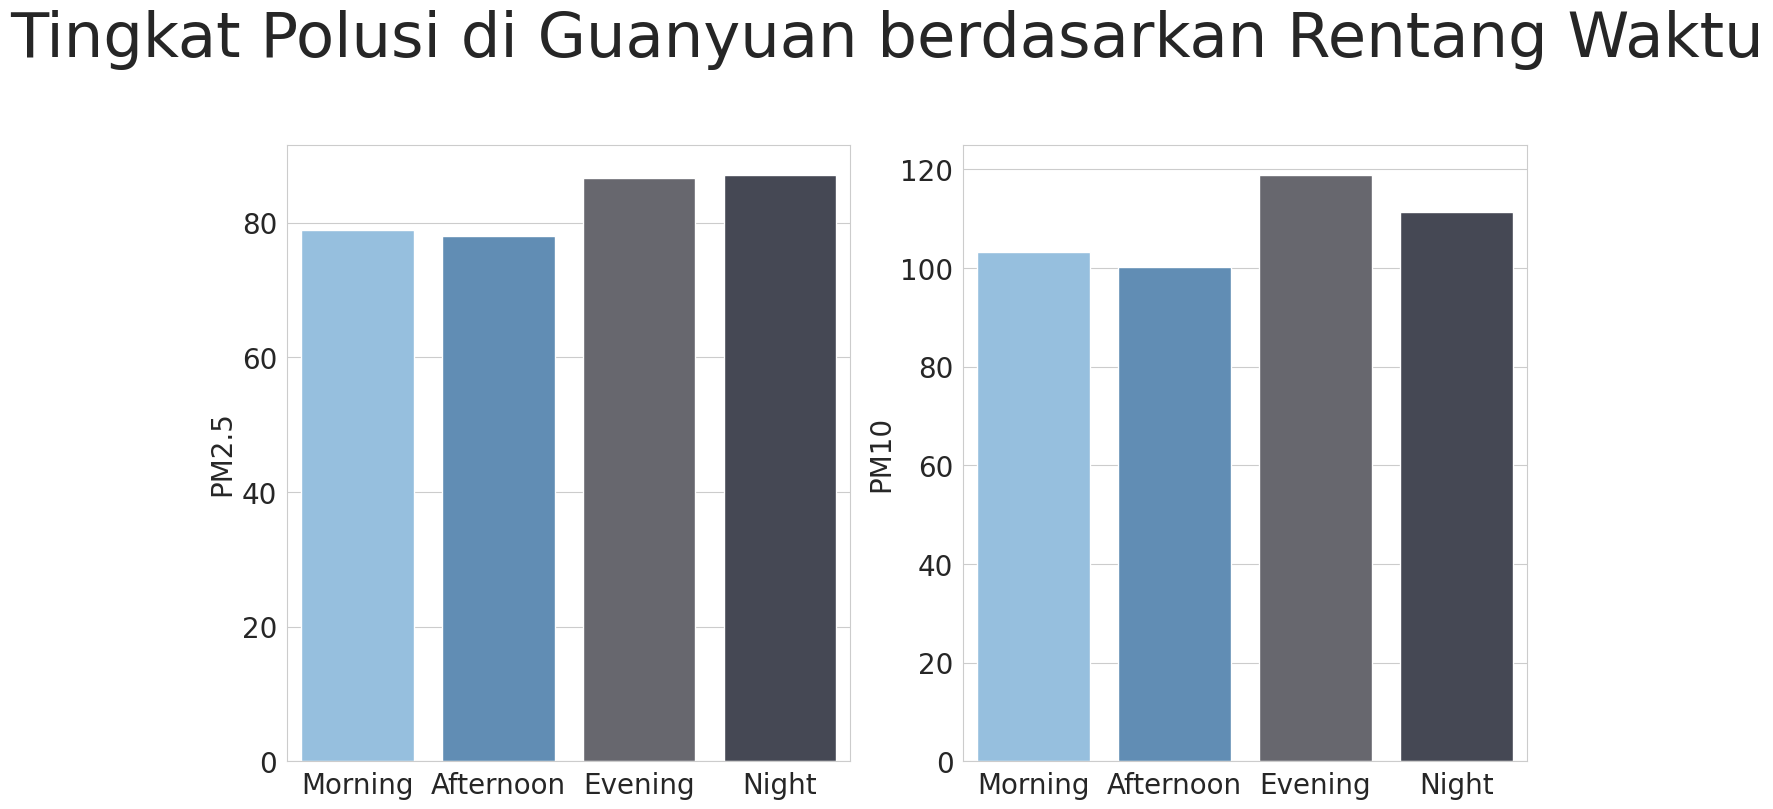

In [55]:
timespan_bar_graph(timespan_particle_df)

## Conclusion

Kesimpulan yang didapat dari hasil analisis terhadap dataset yaitu:
- Trend tingkat polusi udara di Guanyuan cenderung berubah-ubah. Akan tetapi, nilai rata rata parameter tingkat polusi udara PM2.5 dan PM10  pada tahun 2013-2017 cenderung berada pada kondisi tidak sehat untuk PM2.5 dan kondisi sedang untuk PM10
- Trend perubahan suhu udara di Guanyuan cenderung berubah-ubah. Akan tetapi, nilai rata rata suhu udara pada tahun 2013-2017 menunjukkan suhu tertinggi dicapai saat tahun 2013. Sedangkan terdapat perubahan drastis pada tekanan udara dalam periode waktu 2016 dan 2017, dimana tahun 2017 merupakan tahun dimana tingkat tekanan udara mencapai tingkatan yang **tertinggi** diantara 3 tahun sebelumnya.
- Tingkat polusi umumnya tidak berpengaruh terhadap perubahan suhu dan udara karna nilai korelasinya masih di antara -0,5 sampai 0,5. Akan tetapi nilai korelasi antara O3 dengan suhu mencapai diatas 0,5. Sehingga kenaikan polusi O3 akan menyebabkan kenaikan suhu
- Berdasarkan data PM2.5 nilai partikulat paling banyak ketika rentang waktu 00.00-05.00 atau ketika night. Sedangkan data PM10 menunjukkan nilai partikulat paling banyak ketika rentang waktu 17.00-23.00 atau ketika evening.